In [2]:
#carico il csv in un dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
absence = pd.read_csv('DATI/csi_data_senzapersone2.csv')

In [4]:
absence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58330 entries, 0 to 58329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   .type              58330 non-null  object
 1   id                 58330 non-null  int64 
 2   mac                58330 non-null  object
 3   rssi               58330 non-null  int64 
 4   rate               58330 non-null  int64 
 5   sig_mode           58330 non-null  int64 
 6   mcs                58330 non-null  int64 
 7   bandwidth          58330 non-null  int64 
 8   smoothing          58330 non-null  int64 
 9   not_sounding       58330 non-null  int64 
 10  aggregation        58330 non-null  int64 
 11  stbc               58330 non-null  int64 
 12  fec_coding         58330 non-null  int64 
 13  sgi                58330 non-null  int64 
 14  noise_floor        58330 non-null  int64 
 15  ampdu_cnt          58330 non-null  int64 
 16  channel            58330 non-null  int64

In [5]:
absence.isnull().sum()

.type                0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [6]:
csi_absence=pd.DataFrame(absence['data'])

In [7]:
# Funzione per convertire la colonna 'data' in array di numeri complessi
def convert_csi_data(row):
    try:
        # Rimuove parentesi quadre e separa i valori
        values = row.strip("[]").split(",")
        values = [int(v.strip()) for v in values]
        # Gruppi di 2: (Im, Re) -> Re + jIm  (https://docs.espressif.com/projects/esp-idf/en/latest/esp32/api-guides/wifi.html#wi-fi-channel-state-information)
        complex_values = [complex(values[i+1], values[i]) for i in range(0, len(values), 2)]
        return complex_values
    except:
        return np.nan


In [8]:
csi_absence['csi_complex'] = csi_absence['data'].apply(convert_csi_data)

In [9]:
def check_column_lengths(df, column_name):
    """
    Controlla se tutti gli elementi nella colonna specificata del DataFrame
    hanno la stessa lunghezza (funziona con array, liste, stringhe, ecc.).

    Parametri:
        df (pd.DataFrame): Il DataFrame da analizzare
        column_name (str): Il nome della colonna da verificare

    Output:
        Stampa il risultato della verifica
    """
    lengths = df[column_name].apply(len)
    all_equal = lengths.nunique() == 1

    print(f"Tutte le righe nella colonna '{column_name}' hanno la stessa lunghezza? {all_equal}")

    if not all_equal:
        print("Lunghezze diverse trovate:")
        print(lengths.value_counts())


In [10]:
check_column_lengths(csi_absence, 'csi_complex')


Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [11]:
csi_absence['csi_complex']

0        [0j, 0j, 0j, 0j, 0j, 0j, (1-12j), (1-12j), (1-...
1        [0j, 0j, 0j, 0j, 0j, 0j, (9-8j), (8-8j), (9-8j...
2        [0j, 0j, 0j, 0j, 0j, 0j, (-12+5j), (-11+5j), (...
3        [0j, 0j, 0j, 0j, 0j, 0j, (-12-4j), (-12-3j), (...
4        [0j, 0j, 0j, 0j, 0j, 0j, (11-4j), (11-4j), (11...
                               ...                        
58325    [0j, 0j, 0j, 0j, 0j, 0j, (12-1j), (12-1j), (12...
58326    [0j, 0j, 0j, 0j, 0j, 0j, (3+12j), (3+11j), (3+...
58327    [0j, 0j, 0j, 0j, 0j, 0j, (-2-13j), (-2-13j), (...
58328    [0j, 0j, 0j, 0j, 0j, 0j, (11+6j), (11+5j), (10...
58329    [0j, 0j, 0j, 0j, 0j, 0j, (1+12j), (1+11j), 12j...
Name: csi_complex, Length: 58330, dtype: object

In [12]:
df_absence= pd.DataFrame(csi_absence['csi_complex'].tolist())

In [13]:
df_absence

0         1         2         3         4         5           6    \
0      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   1.0-12.0j   
1      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   9.0- 8.0j   
2      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -12.0+ 5.0j   
3      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -12.0- 4.0j   
4      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  11.0- 4.0j   
...         ...       ...       ...       ...       ...       ...         ...   
58325  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  12.0- 1.0j   
58326  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   3.0+12.0j   
58327  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  -2.0-13.0j   
58328  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  11.0+ 6.0j   
58329  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j   1.0+12.0j   

              7           8           9    ...         182         183  \
0       1.0-12.0j   1.0-12.0j   1.0-12.0j  ... -59.0- 5.0j -64.0+ 2.0j   
1       8.0- 8.0j   9.0- 8.0j   8.0- 8.0j  ... -45.0-36.0j -55.0-36.0j   
2     -11.0+ 5.0j -11.0+ 4.0j -11.0+ 5.0j  ...  34.0+48.0j  31.0+52.0j   
3     -12.0- 3.0j -12.0- 5.0j -12.0- 4.0j  ... -16.0+60.0j -15.0+58.0j   
4      11.0- 4.0j  11.0- 3.0j  11.0- 4.0j  ...   0.0-65.0j   4.0-60.0j   
...           ...         ...         ...  ...         ...         ...   
58325  12.0- 1.0j  12.0+ 0.0j  12.0- 1.0j  ...  -6.0-62.0j -10.0-63.0j   
58326   3.0+11.0j   3.0+12.0j   3.0+12.0j  ...  55.0-37.0j  62.0-36.0j   
58327  -2.0-13.0j  -1.0-13.0j  -2.0-13.0j  ... -61.0+ 5.0j -68.0+ 6.0j   
58328  11.0+ 5.0j  10.0+ 6.0j  10.0+ 5.0j  ...  10.0-62.0j  14.0-64.0j   
58329   1.0+11.0j   0.0+12.0j   1.0+12.0j  ...  58.0-22.0j  57.0-23.0j   

              184         185         186         187         188         189  \
0     -66.0+ 1.0j -66.0- 3.0j -66.0- 3.0j -64.0- 5.0j -68.0+ 0.0j -71.0- 5.0j   
1     -47.0-34.0j -49.0-38.0j -55.0-37.0j -51.0-39.0j -51.0-39.0j -54.0-39.0j   
2      34.0+48.0j  28.0+49.0j  33.0+52.0j  32.0+49.0j  34.0+59.0j  34.0+55.0j   
3     -16.0+49.0j -20.0+59.0j -19.0+57.0j -24.0+52.0j -28.0+62.0j -28.0+63.0j   
4       1.0-62.0j   4.0-64.0j  -6.0-62.0j   0.0-64.0j  -1.0-68.0j   4.0-65.0j   
...           ...         ...         ...         ...         ...         ...   
58325  -7.0-70.0j  -4.0-71.0j -11.0-71.0j  -7.0-69.0j  -3.0-77.0j -10.0-73.0j   
58326  54.0-32.0j  63.0-30.0j  59.0-38.0j  57.0-34.0j  65.0-37.0j  62.0-39.0j   
58327 -67.0+ 6.0j -70.0+ 0.0j -63.0+ 4.0j -67.0+ 4.0j -72.0+ 1.0j -76.0+ 3.0j   
58328  14.0-62.0j  16.0-64.0j   8.0-76.0j  14.0-63.0j  14.0-70.0j  14.0-72.0j   
58329  57.0-26.0j  66.0-22.0j  65.0-26.0j  61.0-22.0j  68.0-28.0j  67.0-28.0j   

              190       191  
0     -68.0- 3.0j  0.0+0.0j  
1     -54.0-43.0j  0.0+0.0j  
2      36.0+57.0j  0.0+0.0j  
3     -22.0+64.0j  0.0+0.0j  
4       9.0-68.0j  0.0+0.0j  
...           ...       ...  
58325  -9.0-72.0j  0.0+0.0j  
58326  62.0-35.0j  0.0+0.0j  
58327 -70.0+ 5.0j  0.0+0.0j  
58328  13.0-70.0j  0.0+0.0j  
58329  66.0-23.0j  0.0+0.0j  

[58330 rows x 192 columns]

In [14]:
df_absenceHTLTF = df_absence.iloc[:, 64:192]

In [15]:
df_absenceHTLTF

64        65          66          67          68          69   \
0      0.0+0.0j  0.0+0.0j   0.0-67.0j   1.0-69.0j   9.0-67.0j   4.0-69.0j   
1      0.0+0.0j  0.0+0.0j  35.0-52.0j  35.0-55.0j  42.0-50.0j  40.0-52.0j   
2      0.0+0.0j  0.0+0.0j -60.0+32.0j -54.0+36.0j -54.0+29.0j -56.0+31.0j   
3      0.0+0.0j  0.0+0.0j -69.0-21.0j -63.0-24.0j -60.0-27.0j -61.0-21.0j   
4      0.0+0.0j  0.0+0.0j  70.0- 4.0j  68.0- 2.0j  67.0+ 4.0j  63.0+ 2.0j   
...         ...       ...         ...         ...         ...         ...   
58325  0.0+0.0j  0.0+0.0j  72.0- 9.0j  69.0-12.0j  69.0- 8.0j  67.0-11.0j   
58326  0.0+0.0j  0.0+0.0j  38.0+57.0j  38.0+55.0j  34.0+58.0j  38.0+58.0j   
58327  0.0+0.0j  0.0+0.0j -13.0-69.0j  -3.0-74.0j  -1.0-67.0j  -7.0-68.0j   
58328  0.0+0.0j  0.0+0.0j  74.0+ 7.0j  65.0+ 8.0j  69.0+13.0j  68.0+ 9.0j   
58329  0.0+0.0j  0.0+0.0j  28.0+65.0j  25.0+62.0j  24.0+72.0j  25.0+66.0j   

              70          71          72          73   ...         182  \
0       0.0-69.0j   2.0-63.0j   9.0-61.0j   1.0-67.0j  ... -59.0- 5.0j   
1      40.0-52.0j  37.0-49.0j  38.0-47.0j  37.0-46.0j  ... -45.0-36.0j   
2     -55.0+29.0j -55.0+32.0j -53.0+31.0j -56.0+35.0j  ...  34.0+48.0j   
3     -64.0-27.0j -59.0-20.0j -60.0-24.0j -56.0-22.0j  ... -16.0+60.0j   
4      60.0+ 0.0j  60.0- 1.0j  60.0+ 9.0j  66.0+ 2.0j  ...   0.0-65.0j   
...           ...         ...         ...         ...  ...         ...   
58325  65.0- 9.0j  66.0-10.0j  65.0- 7.0j  67.0-10.0j  ...  -6.0-62.0j   
58326  30.0+60.0j  35.0+58.0j  32.0+58.0j  33.0+58.0j  ...  55.0-37.0j   
58327  -2.0-75.0j  -4.0-61.0j  -4.0-67.0j  -8.0-61.0j  ... -61.0+ 5.0j   
58328  64.0+ 7.0j  65.0+ 7.0j  64.0+12.0j  62.0+10.0j  ...  10.0-62.0j   
58329  17.0+62.0j  19.0+61.0j  22.0+60.0j  20.0+61.0j  ...  58.0-22.0j   

              183         184         185         186         187         188  \
0     -64.0+ 2.0j -66.0+ 1.0j -66.0- 3.0j -66.0- 3.0j -64.0- 5.0j -68.0+ 0.0j   
1     -55.0-36.0j -47.0-34.0j -49.0-38.0j -55.0-37.0j -51.0-39.0j -51.0-39.0j   
2      31.0+52.0j  34.0+48.0j  28.0+49.0j  33.0+52.0j  32.0+49.0j  34.0+59.0j   
3     -15.0+58.0j -16.0+49.0j -20.0+59.0j -19.0+57.0j -24.0+52.0j -28.0+62.0j   
4       4.0-60.0j   1.0-62.0j   4.0-64.0j  -6.0-62.0j   0.0-64.0j  -1.0-68.0j   
...           ...         ...         ...         ...         ...         ...   
58325 -10.0-63.0j  -7.0-70.0j  -4.0-71.0j -11.0-71.0j  -7.0-69.0j  -3.0-77.0j   
58326  62.0-36.0j  54.0-32.0j  63.0-30.0j  59.0-38.0j  57.0-34.0j  65.0-37.0j   
58327 -68.0+ 6.0j -67.0+ 6.0j -70.0+ 0.0j -63.0+ 4.0j -67.0+ 4.0j -72.0+ 1.0j   
58328  14.0-64.0j  14.0-62.0j  16.0-64.0j   8.0-76.0j  14.0-63.0j  14.0-70.0j   
58329  57.0-23.0j  57.0-26.0j  66.0-22.0j  65.0-26.0j  61.0-22.0j  68.0-28.0j   

              189         190       191  
0     -71.0- 5.0j -68.0- 3.0j  0.0+0.0j  
1     -54.0-39.0j -54.0-43.0j  0.0+0.0j  
2      34.0+55.0j  36.0+57.0j  0.0+0.0j  
3     -28.0+63.0j -22.0+64.0j  0.0+0.0j  
4       4.0-65.0j   9.0-68.0j  0.0+0.0j  
...           ...         ...       ...  
58325 -10.0-73.0j  -9.0-72.0j  0.0+0.0j  
58326  62.0-39.0j  62.0-35.0j  0.0+0.0j  
58327 -76.0+ 3.0j -70.0+ 5.0j  0.0+0.0j  
58328  14.0-72.0j  13.0-70.0j  0.0+0.0j  
58329  67.0-28.0j  66.0-23.0j  0.0+0.0j  

[58330 rows x 128 columns]

In [16]:
#trovo le collone che non sono zero
df_absenceHTLTFvalid = df_absenceHTLTF.loc[:, (df_absenceHTLTF != 0).any(axis=0)]

In [17]:
df_absenceHTLTFvalid

66          67          68          69          70          71   \
0       0.0-67.0j   1.0-69.0j   9.0-67.0j   4.0-69.0j   0.0-69.0j   2.0-63.0j   
1      35.0-52.0j  35.0-55.0j  42.0-50.0j  40.0-52.0j  40.0-52.0j  37.0-49.0j   
2     -60.0+32.0j -54.0+36.0j -54.0+29.0j -56.0+31.0j -55.0+29.0j -55.0+32.0j   
3     -69.0-21.0j -63.0-24.0j -60.0-27.0j -61.0-21.0j -64.0-27.0j -59.0-20.0j   
4      70.0- 4.0j  68.0- 2.0j  67.0+ 4.0j  63.0+ 2.0j  60.0+ 0.0j  60.0- 1.0j   
...           ...         ...         ...         ...         ...         ...   
58325  72.0- 9.0j  69.0-12.0j  69.0- 8.0j  67.0-11.0j  65.0- 9.0j  66.0-10.0j   
58326  38.0+57.0j  38.0+55.0j  34.0+58.0j  38.0+58.0j  30.0+60.0j  35.0+58.0j   
58327 -13.0-69.0j  -3.0-74.0j  -1.0-67.0j  -7.0-68.0j  -2.0-75.0j  -4.0-61.0j   
58328  74.0+ 7.0j  65.0+ 8.0j  69.0+13.0j  68.0+ 9.0j  64.0+ 7.0j  65.0+ 7.0j   
58329  28.0+65.0j  25.0+62.0j  24.0+72.0j  25.0+66.0j  17.0+62.0j  19.0+61.0j   

              72          73          74          75   ...         181  \
0       9.0-61.0j   1.0-67.0j   3.0-66.0j   4.0-58.0j  ... -61.0- 1.0j   
1      38.0-47.0j  37.0-46.0j  38.0-48.0j  37.0-45.0j  ... -49.0-32.0j   
2     -53.0+31.0j -56.0+35.0j -51.0+28.0j -47.0+32.0j  ...  32.0+46.0j   
3     -60.0-24.0j -56.0-22.0j -59.0-19.0j -52.0-25.0j  ... -19.0+53.0j   
4      60.0+ 9.0j  66.0+ 2.0j  58.0+ 8.0j  60.0+ 5.0j  ...  -4.0-63.0j   
...           ...         ...         ...         ...  ...         ...   
58325  65.0- 7.0j  67.0-10.0j  61.0-10.0j  62.0- 9.0j  ...  -7.0-64.0j   
58326  32.0+58.0j  33.0+58.0j  32.0+54.0j  30.0+54.0j  ...  50.0-34.0j   
58327  -4.0-67.0j  -8.0-61.0j  -3.0-66.0j  -3.0-62.0j  ... -63.0+ 5.0j   
58328  64.0+12.0j  62.0+10.0j  60.0+ 7.0j  60.0+10.0j  ...  16.0-60.0j   
58329  22.0+60.0j  20.0+61.0j  15.0+56.0j  21.0+59.0j  ...  57.0-22.0j   

              182         183         184         185         186         187  \
0     -59.0- 5.0j -64.0+ 2.0j -66.0+ 1.0j -66.0- 3.0j -66.0- 3.0j -64.0- 5.0j   
1     -45.0-36.0j -55.0-36.0j -47.0-34.0j -49.0-38.0j -55.0-37.0j -51.0-39.0j   
2      34.0+48.0j  31.0+52.0j  34.0+48.0j  28.0+49.0j  33.0+52.0j  32.0+49.0j   
3     -16.0+60.0j -15.0+58.0j -16.0+49.0j -20.0+59.0j -19.0+57.0j -24.0+52.0j   
4       0.0-65.0j   4.0-60.0j   1.0-62.0j   4.0-64.0j  -6.0-62.0j   0.0-64.0j   
...           ...         ...         ...         ...         ...         ...   
58325  -6.0-62.0j -10.0-63.0j  -7.0-70.0j  -4.0-71.0j -11.0-71.0j  -7.0-69.0j   
58326  55.0-37.0j  62.0-36.0j  54.0-32.0j  63.0-30.0j  59.0-38.0j  57.0-34.0j   
58327 -61.0+ 5.0j -68.0+ 6.0j -67.0+ 6.0j -70.0+ 0.0j -63.0+ 4.0j -67.0+ 4.0j   
58328  10.0-62.0j  14.0-64.0j  14.0-62.0j  16.0-64.0j   8.0-76.0j  14.0-63.0j   
58329  58.0-22.0j  57.0-23.0j  57.0-26.0j  66.0-22.0j  65.0-26.0j  61.0-22.0j   

              188         189         190  
0     -68.0+ 0.0j -71.0- 5.0j -68.0- 3.0j  
1     -51.0-39.0j -54.0-39.0j -54.0-43.0j  
2      34.0+59.0j  34.0+55.0j  36.0+57.0j  
3     -28.0+62.0j -28.0+63.0j -22.0+64.0j  
4      -1.0-68.0j   4.0-65.0j   9.0-68.0j  
...           ...         ...         ...  
58325  -3.0-77.0j -10.0-73.0j  -9.0-72.0j  
58326  65.0-37.0j  62.0-39.0j  62.0-35.0j  
58327 -72.0+ 1.0j -76.0+ 3.0j -70.0+ 5.0j  
58328  14.0-70.0j  14.0-72.0j  13.0-70.0j  
58329  68.0-28.0j  67.0-28.0j  66.0-23.0j  

[58330 rows x 114 columns]

In [18]:
#calolco il modulo
df_absenceHTLTFvalid_mod = np.abs(df_absenceHTLTFvalid)

In [19]:
def extract_features(subcarrier_series):
    return pd.Series({
        'mean': subcarrier_series.mean(),
        'std': subcarrier_series.std(),
        'variance': subcarrier_series.var()
    })


In [20]:
# Applichiamo extract_features per ogni subcarrier (colonna)
feature_absence = df_absenceHTLTFvalid_mod.apply(extract_features, axis=0).T

In [21]:
unapersona_ferma = pd.read_csv('DATI/csi_data_1personaferma.csv')

In [22]:
unapersona_ferma.isnull().sum()

type                 0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [23]:
csi_unapersona_ferma= pd.DataFrame(unapersona_ferma['data'])

In [24]:
csi_unapersona_ferma['csi_complex'] = csi_unapersona_ferma['data'].apply(convert_csi_data)

In [25]:
check_column_lengths(csi_unapersona_ferma, 'csi_complex')


Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [26]:
df_unapersonaferma= pd.DataFrame(csi_unapersona_ferma['csi_complex'].tolist())

In [27]:
df_unapersonafermaHTLTF = df_unapersonaferma.iloc[:, 64:192]

In [28]:
#trovo le collone che non sono zero
df_unapersonafermaHTLTFvalid = df_unapersonafermaHTLTF.loc[:, (df_unapersonafermaHTLTF != 0).any(axis=0)]

In [29]:
#calolco il modulo
df_unapersonafermaHTLTFvalid_mod = np.abs(df_unapersonafermaHTLTFvalid)

In [30]:
# Applichiamo extract_features per ogni subcarrier (colonna)
feature_unapersonaferma = df_unapersonafermaHTLTFvalid_mod.apply(extract_features, axis=0).T

In [31]:
unapersona_movimento = pd.read_csv('DATI/csi_data_1personainmovimento.csv')

In [32]:
unapersona_movimento.isnull().sum()

type                 0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [33]:
csi_unapersona_movimento= pd.DataFrame(unapersona_movimento['data'])

In [34]:
csi_unapersona_movimento['csi_complex'] = csi_unapersona_movimento['data'].apply(convert_csi_data)

In [35]:
check_column_lengths(csi_unapersona_movimento, 'csi_complex')


Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [36]:
df_unapersona_movimento= pd.DataFrame(csi_unapersona_movimento['csi_complex'].tolist())

In [37]:
df_unapersona_movimentoHTLTF = df_unapersona_movimento.iloc[:, 64:192]

In [38]:
#trovo le collone che non sono zero
df_unapersona_movimentoHTLTFvalid = df_unapersona_movimentoHTLTF.loc[:, (df_unapersona_movimentoHTLTF != 0).any(axis=0)]

In [39]:
#calolco il modulo
df_unapersona_movimentoHTLTFvalid_mod = np.abs(df_unapersona_movimentoHTLTFvalid)

In [40]:
# Applichiamo extract_features per ogni subcarrier (colonna)
feature_unapersona_movimento = df_unapersona_movimentoHTLTFvalid_mod.apply(extract_features, axis=0).T

In [41]:
duepersoneferme = pd.read_csv('DATI/csi_data_2persone.csv')

In [42]:
duepersoneferme.isnull().sum()

type                 0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [43]:
csi_duepersoneferme= pd.DataFrame(duepersoneferme['data'])

In [44]:
csi_duepersoneferme['csi_complex'] = csi_duepersoneferme['data'].apply(convert_csi_data)

In [45]:
csi_duepersoneferme['csi_complex']

0       [0j, 0j, 0j, 0j, 0j, 0j, (-2-10j), (-2-10j), (...
1       [0j, 0j, 0j, 0j, 0j, 0j, (1+9j), (1+9j), (1+9j...
2       [0j, 0j, 0j, 0j, 0j, 0j, (3-9j), (3-9j), (3-9j...
3       [0j, 0j, 0j, 0j, 0j, 0j, (-8+6j), (-7+6j), (-7...
4       [0j, 0j, 0j, 0j, 0j, 0j, (-8+6j), (-8+6j), (-8...
                              ...                        
5356    [0j, 0j, 0j, 0j, 0j, 0j, (-11+4j), (-11+4j), (...
5357    [0j, 0j, 0j, 0j, 0j, 0j, (1+11j), (1+11j), (1+...
5358    [0j, 0j, 0j, 0j, 0j, 0j, (10+3j), (10+3j), (10...
5359    [0j, 0j, 0j, 0j, 0j, 0j, (6-10j), (6-10j), (6-...
5360    [0j, 0j, 0j, 0j, 0j, 0j, (-10-7j), (-10-7j), (...
Name: csi_complex, Length: 5361, dtype: object

In [46]:
check_column_lengths(csi_duepersoneferme, 'csi_complex')

Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [47]:
df_duepersoneferme= pd.DataFrame(csi_duepersoneferme['csi_complex'].tolist())

In [48]:
df_duepersoneferemeHTLTF = df_duepersoneferme.iloc[:, 64:192]

In [49]:
df_duepersonefermeHTLTFvalid = df_duepersoneferemeHTLTF.loc[:, (df_duepersoneferemeHTLTF != 0).any(axis=0)]

In [50]:
df_duepersonefermeHTLTFvalid_mod = np.abs(df_duepersonefermeHTLTFvalid)

In [51]:
df_absenceHTLTFvalid_mod

66         67         68         69         70         71   \
0      67.000000  69.007246  67.601775  69.115845  69.000000  63.031738   
1      62.681736  65.192024  65.299311  65.604878  65.604878  61.400326   
2      68.000000  64.899923  61.294372  64.007812  62.177166  63.631753   
3      72.124892  67.416615  65.795137  64.513564  69.462220  62.297673   
4      70.114193  68.029405  67.119297  63.031738  60.000000  60.008333   
...          ...        ...        ...        ...        ...        ...   
58325  72.560320  70.035705  69.462220  67.896981  65.620119  66.753277   
58326  68.505474  66.850580  67.230945  69.339743  67.082039  67.742158   
58327  70.213959  74.060786  67.007462  68.359345  75.026662  61.131007   
58328  74.330344  65.490457  70.213959  68.593003  64.381674  65.375837   
58329  70.774289  66.850580  75.894664  70.576200  64.288413  63.890531   

             72         73         74         75   ...        181        182  \
0      61.660360  67.007462  66.068147  58.137767  ...  61.008196  59.211485   
1      60.440053  59.033889  61.220911  58.258047  ...  58.523500  57.628118   
2      61.400326  66.037868  58.180753  56.859476  ...  56.035703  58.821765   
3      64.621978  60.166436  61.983869  57.697487  ...  56.302753  62.096699   
4      60.671245  66.030296  58.549125  60.207973  ...  63.126856  65.000000   
...          ...        ...        ...        ...  ...        ...        ...   
58325  65.375837  67.742158  61.814238  62.649820  ...  64.381674  62.289646   
58326  66.241981  66.730802  62.769419  61.773781  ...  60.464866  66.287254   
58327  67.119297  61.522354  66.068147  62.072538  ...  63.198101  61.204575   
58328  65.115282  62.801274  60.406953  60.827625  ...  62.096699  62.801274   
58329  63.906181  64.195015  57.974132  62.625873  ...  61.098281  62.032250   

             183        184        185        186        187        188  \
0      64.031242  66.007575  66.068147  66.068147  64.195015  68.000000   
1      65.734314  58.008620  62.008064  66.287254  64.202804  64.202804   
2      60.539243  58.821765  56.435804  61.587336  58.523500  68.095521   
3      59.908263  51.546096  62.297673  60.083276  57.271284  68.029405   
4      60.133186  62.008064  64.124878  62.289646  64.000000  68.007353   
...          ...        ...        ...        ...        ...        ...   
58325  63.788714  70.349129  71.112587  71.847060  69.354164  77.058419   
58326  71.693793  62.769419  69.778220  70.178344  66.370174  74.793048   
58327  68.264193  67.268120  70.000000  63.126856  67.119297  72.006944   
58328  65.513357  63.560994  65.969690  76.419893  64.536811  71.386273   
58329  61.465437  62.649820  69.570109  70.007142  64.845971  73.539105   

             189        190  
0      71.175839  68.066144  
1      66.610810  69.028979  
2      64.660653  67.416615  
3      68.942005  67.675697  
4      65.122961  68.593003  
...          ...        ...  
58325  73.681748  72.560320  
58326  73.246160  71.196910  
58327  76.059187  70.178344  
58328  73.348483  71.196910  
58329  72.615425  69.892775  

[58330 rows x 114 columns]

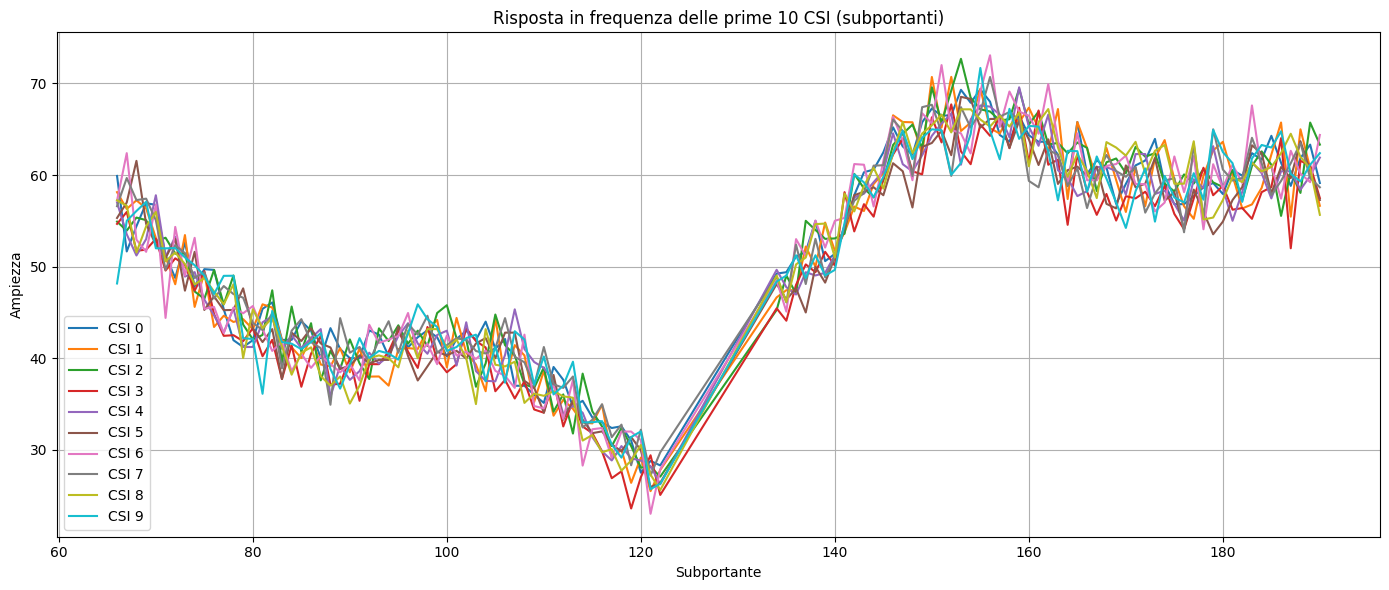

In [52]:

# Plot delle prime 10 righe (CSI)
plt.figure(figsize=(14, 6))

# Converti i nomi delle colonne in interi se non lo sono già
x_values = df_duepersonefermeHTLTFvalid_mod.columns.astype(int)

for i in range(10):
    plt.plot(x_values, df_duepersonefermeHTLTFvalid_mod.iloc[i], label=f'CSI {i}')

plt.title('Risposta in frequenza delle prime 10 CSI (subportanti)')
plt.xlabel('Subportante')
plt.ylabel('Ampiezza')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
feature_duepersoneferme = df_duepersonefermeHTLTFvalid_mod.apply(extract_features, axis=0).T

In [54]:
trepersoneinmovimento = pd.read_csv('DATI/csi_data_3personeinmovimento.csv')

In [55]:
trepersoneinmovimento.isnull().sum()

type                 0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [56]:
csi_trepersoneinmovimento= pd.DataFrame(trepersoneinmovimento['data'])
csi_trepersoneinmovimento['csi_complex'] = csi_trepersoneinmovimento['data'].apply(convert_csi_data)

In [57]:
check_column_lengths(csi_trepersoneinmovimento, 'csi_complex')

Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [58]:
df_trepersoneinmovimento= pd.DataFrame(csi_trepersoneinmovimento['csi_complex'].tolist())
df_trepersoneinmovimentoHTLTF = df_trepersoneinmovimento.iloc[:, 64:192]

In [59]:
df_trepersoneinmovimento

0         1         2         3         4         5         6    \
0      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+6.0j   
1      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  1.0+6.0j   
2      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -6.0-1.0j   
3      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -6.0-2.0j   
4      0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -7.0-3.0j   
...         ...       ...       ...       ...       ...       ...       ...   
54050  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  3.0-9.0j   
54051  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  5.0-7.0j   
54052  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  7.0+4.0j   
54053  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  3.0+8.0j   
54054  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j  0.0+0.0j -3.0+8.0j   

            7         8          9    ...         182         183         184  \
0      1.0+7.0j  1.0+7.0j  2.0+ 7.0j  ...  10.0+26.0j  24.0+33.0j  17.0+40.0j   
1      2.0+6.0j  2.0+6.0j  3.0+ 6.0j  ...  11.0+34.0j  22.0+34.0j  20.0+26.0j   
2     -6.0-1.0j -7.0-1.0j -7.0+ 0.0j  ... -39.0+19.0j -31.0+18.0j -36.0+29.0j   
3     -7.0-2.0j -7.0-2.0j -8.0- 1.0j  ... -36.0+13.0j -33.0+ 9.0j -39.0+12.0j   
4     -7.0-3.0j -8.0-2.0j -8.0- 2.0j  ... -38.0+ 8.0j -41.0+ 8.0j -39.0+ 5.0j   
...         ...       ...        ...  ...         ...         ...         ...   
54050  3.0-9.0j  4.0-9.0j  3.0-10.0j  ...  -1.0+ 2.0j -10.0+ 2.0j -12.0+ 0.0j   
54051  5.0-7.0j  6.0-7.0j  6.0- 8.0j  ...  -4.0+ 5.0j  -9.0- 2.0j  -8.0- 2.0j   
54052  8.0+5.0j  7.0+5.0j  8.0+ 5.0j  ...   1.0- 5.0j  -5.0- 9.0j   5.0-12.0j   
54053  3.0+8.0j  2.0+8.0j  3.0+ 9.0j  ...   5.0- 8.0j   5.0- 6.0j   4.0-15.0j   
54054 -3.0+8.0j -4.0+9.0j -4.0+ 9.0j  ...   4.0+ 0.0j   5.0- 2.0j  12.0+ 2.0j   

              185         186         187         188         189         190  \
0      14.0+20.0j  19.0+30.0j  23.0+19.0j  18.0+27.0j  19.0+25.0j  23.0+12.0j   
1      19.0+25.0j  21.0+31.0j  18.0+18.0j  20.0+12.0j  27.0+12.0j  33.0+11.0j   
2     -29.0+29.0j -21.0+36.0j -28.0+22.0j -21.0+23.0j -26.0+28.0j -26.0+29.0j   
3     -27.0+19.0j -37.0+19.0j -23.0+25.0j -36.0+18.0j -25.0+26.0j -18.0+28.0j   
4     -43.0+ 5.0j -37.0+18.0j -31.0+17.0j -31.0+ 7.0j -30.0+11.0j -15.0+17.0j   
...           ...         ...         ...         ...         ...         ...   
54050 -10.0+ 4.0j -18.0+ 0.0j -17.0- 5.0j -26.0+ 2.0j -27.0+ 3.0j -29.0- 1.0j   
54051 -15.0- 6.0j -18.0- 6.0j -20.0- 5.0j -23.0-13.0j -28.0-12.0j -24.0-12.0j   
54052   1.0-15.0j   4.0-12.0j   3.0-15.0j   6.0-24.0j   8.0-26.0j   3.0-25.0j   
54053   7.0- 9.0j  11.0-12.0j  13.0-13.0j  16.0-15.0j  25.0-15.0j  13.0-18.0j   
54054  15.0+ 3.0j  16.0- 7.0j  15.0+ 0.0j  24.0- 2.0j  25.0- 4.0j  31.0+ 1.0j   

            191  
0      0.0+0.0j  
1      0.0+0.0j  
2      0.0+0.0j  
3      0.0+0.0j  
4      0.0+0.0j  
...         ...  
54050  0.0+0.0j  
54051  0.0+0.0j  
54052  0.0+0.0j  
54053  0.0+0.0j  
54054  0.0+0.0j  

[54055 rows x 192 columns]

In [60]:
df_trepersoneinmovimentoHTLTFvalid = df_trepersoneinmovimentoHTLTF.loc[:, (df_trepersoneinmovimentoHTLTF != 0).any(axis=0)]
df_trepersoneinmovimentoHTLTFvalid_mod = np.abs(df_trepersoneinmovimentoHTLTFvalid)

In [61]:
feature_trepersoneinmovimento = df_trepersoneinmovimentoHTLTFvalid_mod.apply(extract_features, axis=0).T

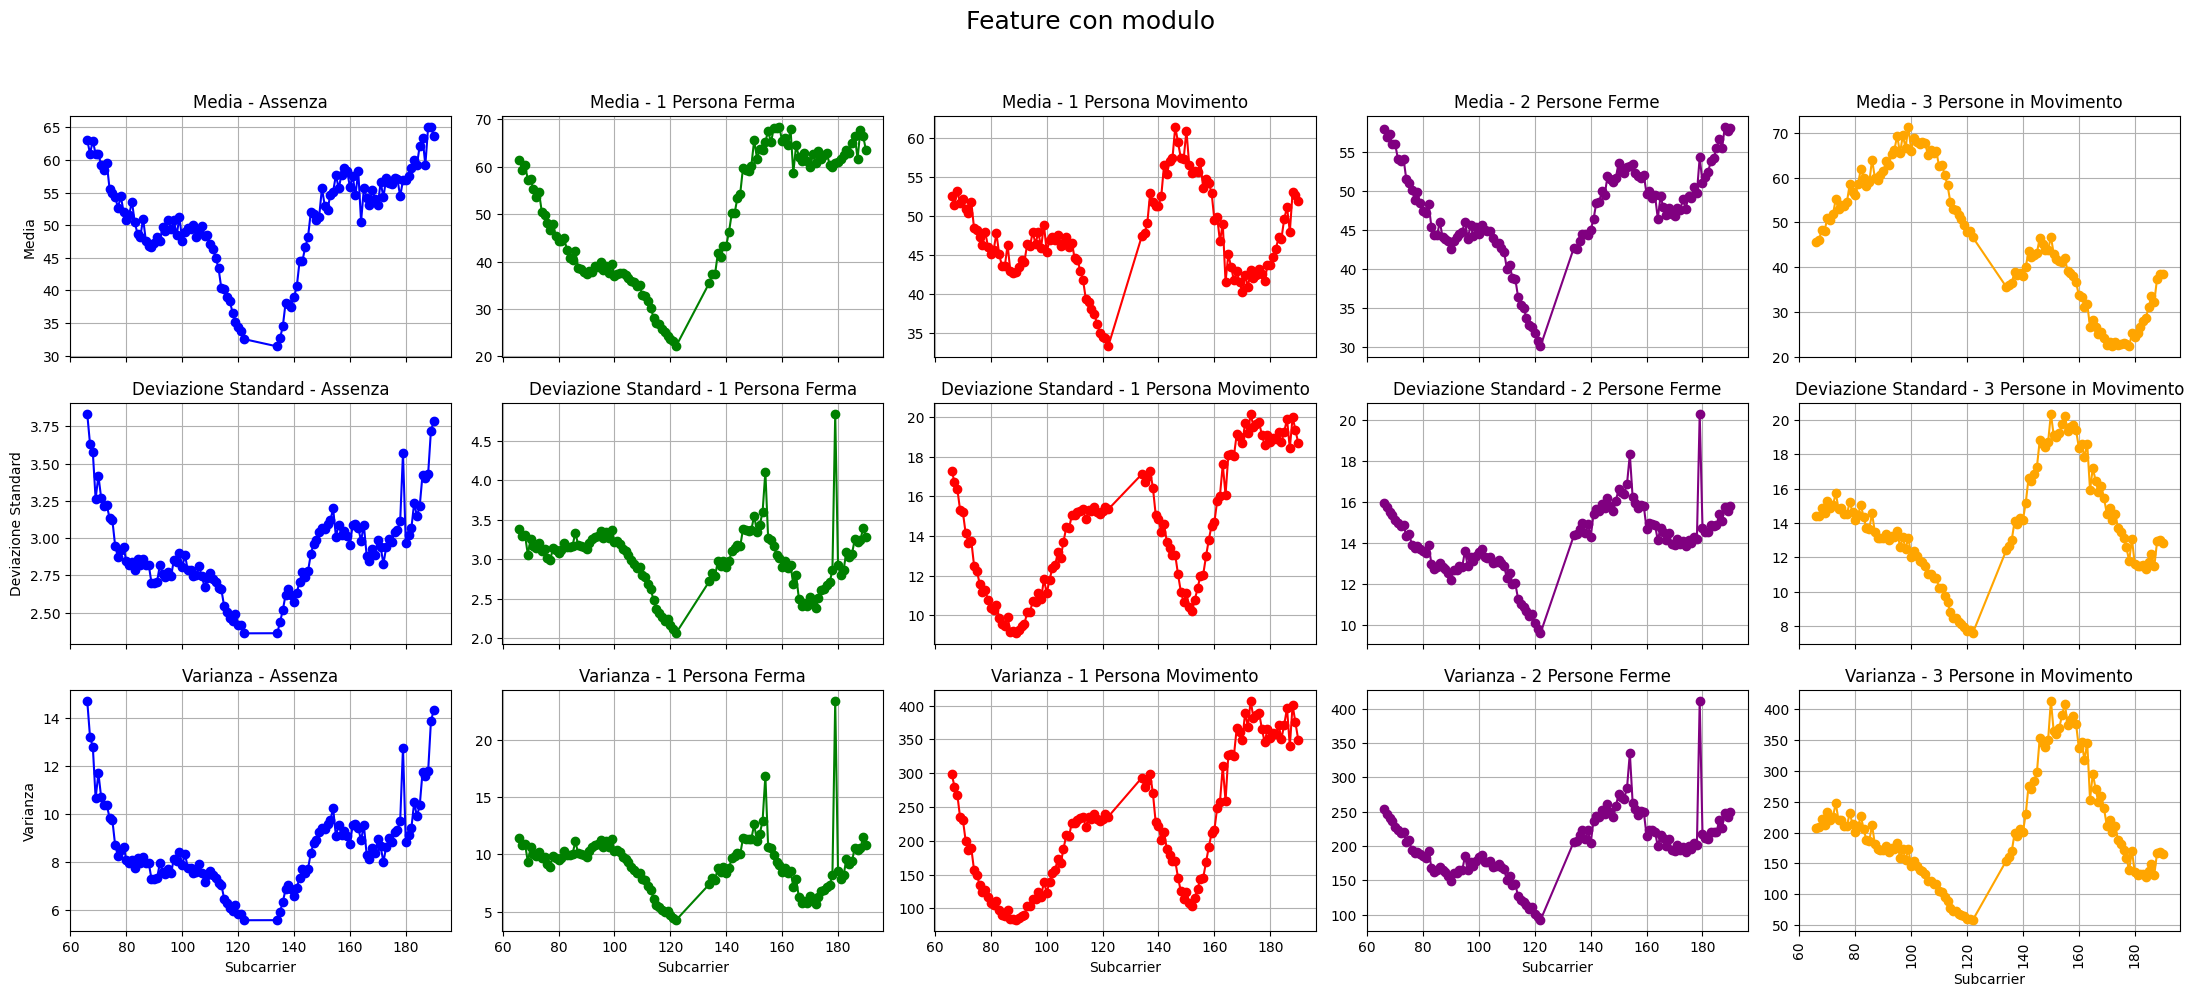

In [62]:
import matplotlib.pyplot as plt

# 3 righe (metriche) × 5 colonne (le tue 5 feature)
fig, axes = plt.subplots(3, 5, figsize=(22, 10), sharex=True)

# Dataset da confrontare
datasets = [
    feature_absence,
    feature_unapersonaferma,
    feature_unapersona_movimento,
    feature_duepersoneferme,
    feature_trepersoneinmovimento
]
titles = [
    'Assenza', 
    '1 Persona Ferma', 
    '1 Persona Movimento', 
    '2 Persone Ferme', 
    '3 Persone in Movimento'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colori coerenti
metrics = ['mean', 'std', 'variance']
metric_labels = ['Media', 'Deviazione Standard', 'Varianza']

# Loop su righe (metriche) e colonne (feature)
for row in range(3):  # mean, std, variance
    for col in range(5):  # 5 feature
        ax = axes[row][col]
        df = datasets[col]
        ax.plot(df.index, df[metrics[row]], marker='o', color=colors[col])
        ax.set_title(f'{metric_labels[row]} - {titles[col]}')
        ax.grid(True)

        if col == 0:
            ax.set_ylabel(metric_labels[row])

        if row == 2:
            ax.set_xlabel('Subcarrier')
fig.suptitle("Feature con modulo ", fontsize=18)
# Ottimizzazione layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.xticks(rotation=90)
plt.show()


 **SOLO CON PARTE REALE**


In [63]:
real_absence= df_absenceHTLTFvalid.applymap(lambda z: z.real)

C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\862256789.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_absence= df_absenceHTLTFvalid.applymap(lambda z: z.real)


In [64]:
real_unaperfonaferma= df_unapersonafermaHTLTFvalid.applymap(lambda z: z.real)
real_unapersona_movimento= df_unapersona_movimentoHTLTFvalid.applymap(lambda z: z.real)

C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\599899121.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_unaperfonaferma= df_unapersonafermaHTLTFvalid.applymap(lambda z: z.real)
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\599899121.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_unapersona_movimento= df_unapersona_movimentoHTLTFvalid.applymap(lambda z: z.real)


In [65]:
real_duepersoneferme= df_duepersonefermeHTLTFvalid.applymap(lambda z: z.real)
real_trepersoneinmovimento= df_trepersoneinmovimentoHTLTFvalid.applymap(lambda z: z.real)

C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\1418023670.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_duepersoneferme= df_duepersonefermeHTLTFvalid.applymap(lambda z: z.real)
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\1418023670.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  real_trepersoneinmovimento= df_trepersoneinmovimentoHTLTFvalid.applymap(lambda z: z.real)


In [66]:
feature_real_absence = real_absence.apply(extract_features, axis=0).T

In [67]:
feature_real_unapersonaferma = real_unaperfonaferma.apply(extract_features, axis=0).T
feature_real_unapersona_movimento = real_unapersona_movimento.apply(extract_features, axis=0).T

In [68]:
feature_real_duepersoneferme = real_duepersoneferme.apply(extract_features, axis=0).T
feature_real_trepersoneinmovimento = real_trepersoneinmovimento.apply(extract_features, axis=0).T

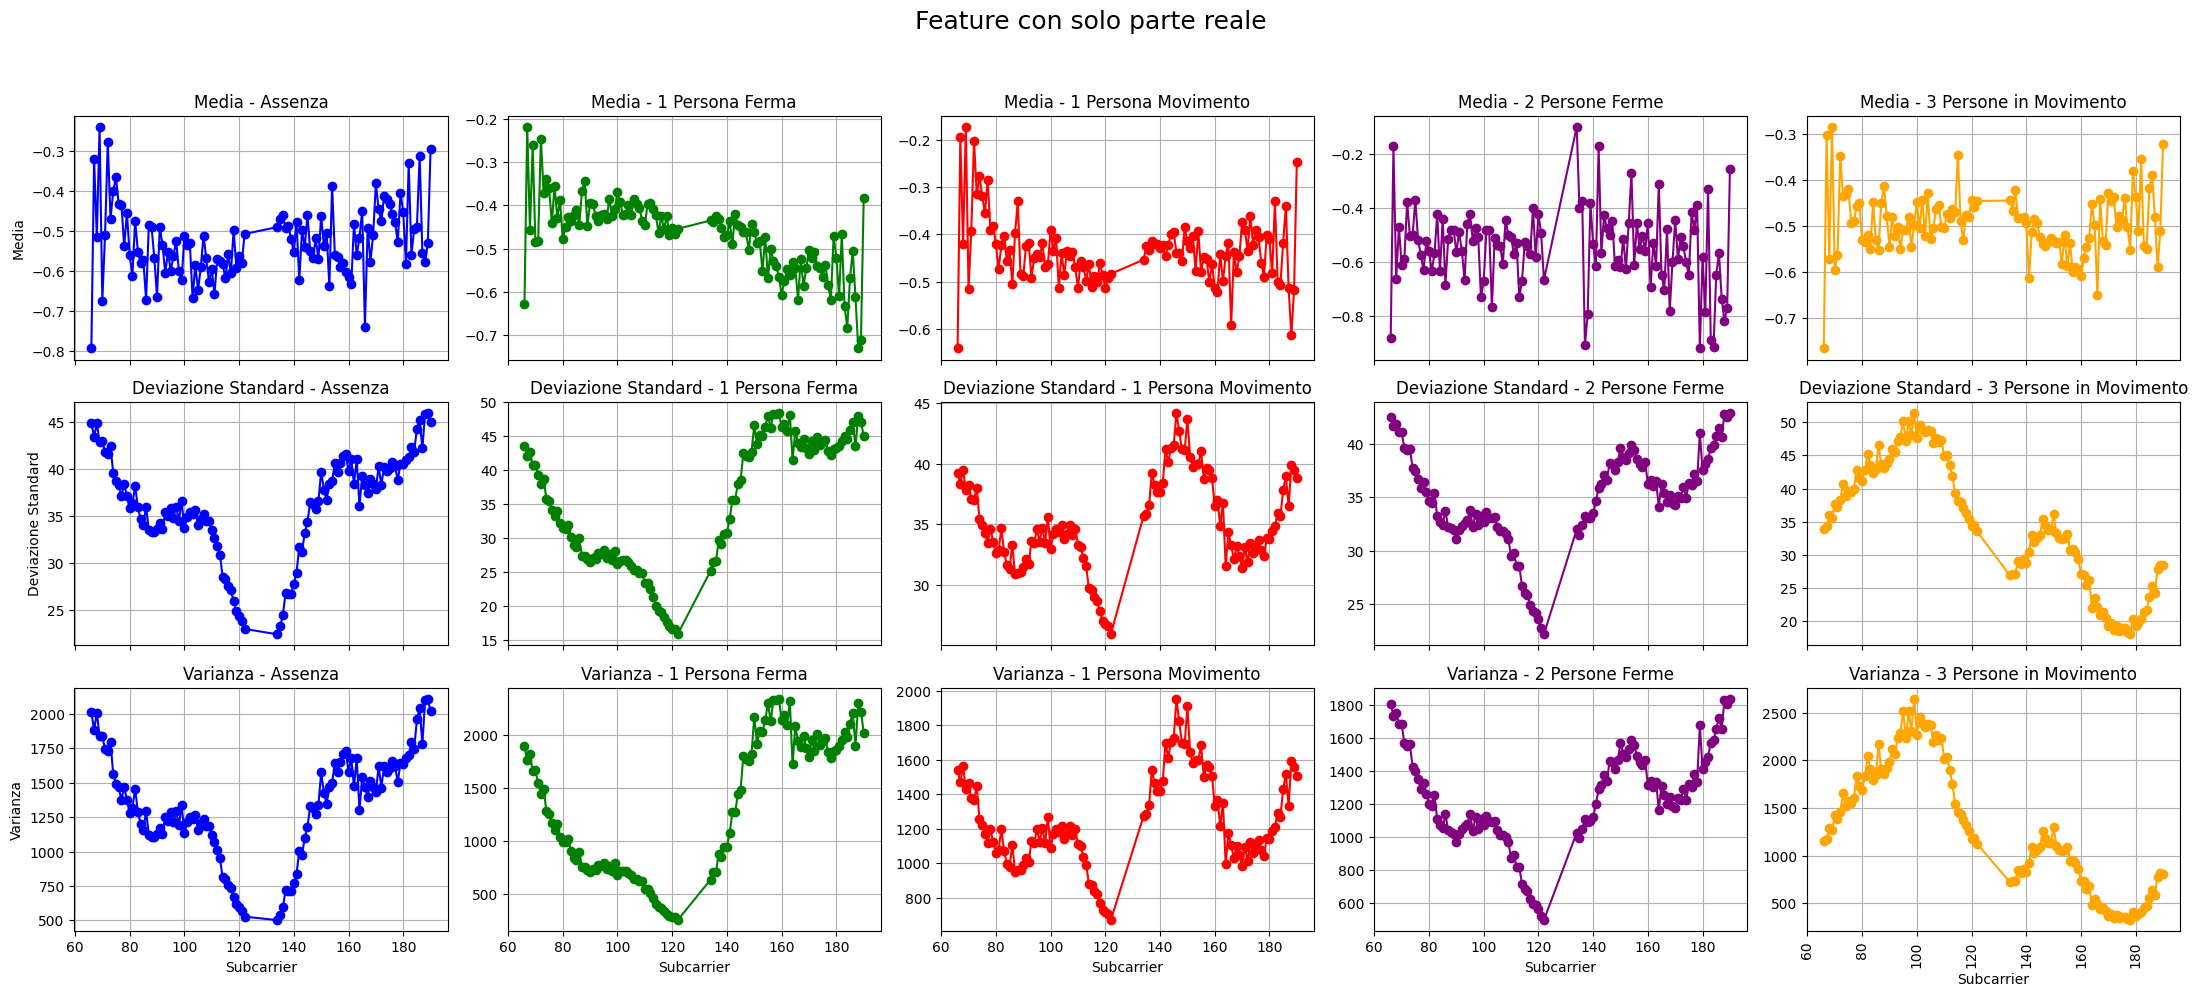

In [69]:
import matplotlib.pyplot as plt

# 3 righe (metriche) × 5 colonne (le tue 5 feature)
fig, axes = plt.subplots(3, 5, figsize=(22, 10), sharex=True)

# Dataset da confrontare
datasets = [
    feature_real_absence,
    feature_real_unapersonaferma,
    feature_real_unapersona_movimento,
    feature_real_duepersoneferme,
    feature_real_trepersoneinmovimento
]
titles = [
    'Assenza', 
    '1 Persona Ferma', 
    '1 Persona Movimento', 
    '2 Persone Ferme', 
    '3 Persone in Movimento'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colori coerenti
metrics = ['mean', 'std', 'variance']
metric_labels = ['Media', 'Deviazione Standard', 'Varianza']

# Loop su righe (metriche) e colonne (feature)
for row in range(3):  # mean, std, variance
    for col in range(5):  # 5 feature
        ax = axes[row][col]
        df = datasets[col]
        ax.plot(df.index, df[metrics[row]], marker='o', color=colors[col])
        ax.set_title(f'{metric_labels[row]} - {titles[col]}')
        ax.grid(True)

        if col == 0:
            ax.set_ylabel(metric_labels[row])

        if row == 2:
            ax.set_xlabel('Subcarrier')

fig.suptitle("Feature con solo parte reale ", fontsize=18)
# Ottimizzazione layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.xticks(rotation=90)
plt.show()


In [70]:
feature_absence

mean       std   variance
66   63.068154  3.834454  14.703038
67   60.963408  3.631139  13.185168
68   62.972057  3.576305  12.789960
69   60.897678  3.263379  10.649641
70   60.839040  3.418297  11.684758
..         ...       ...        ...
186  63.438271  3.425746  11.735733
187  59.210904  3.401676  11.571397
188  65.052301  3.429257  11.759801
189  65.081391  3.720770  13.844129
190  63.715054  3.782507  14.307361

[114 rows x 3 columns]

**Con blocchi di csi**


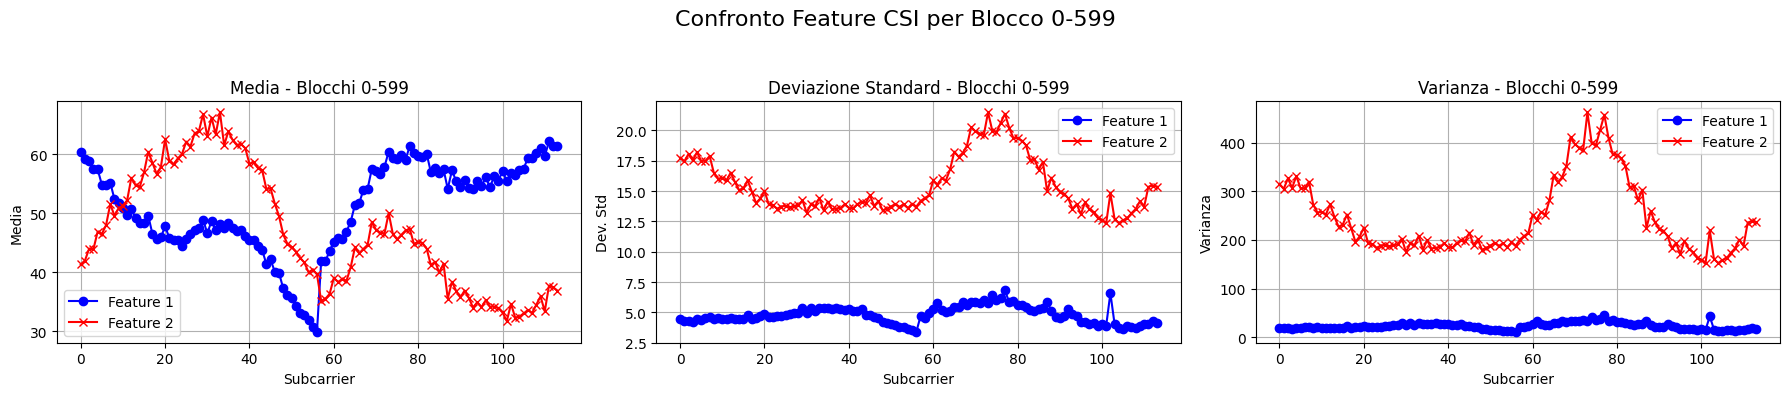

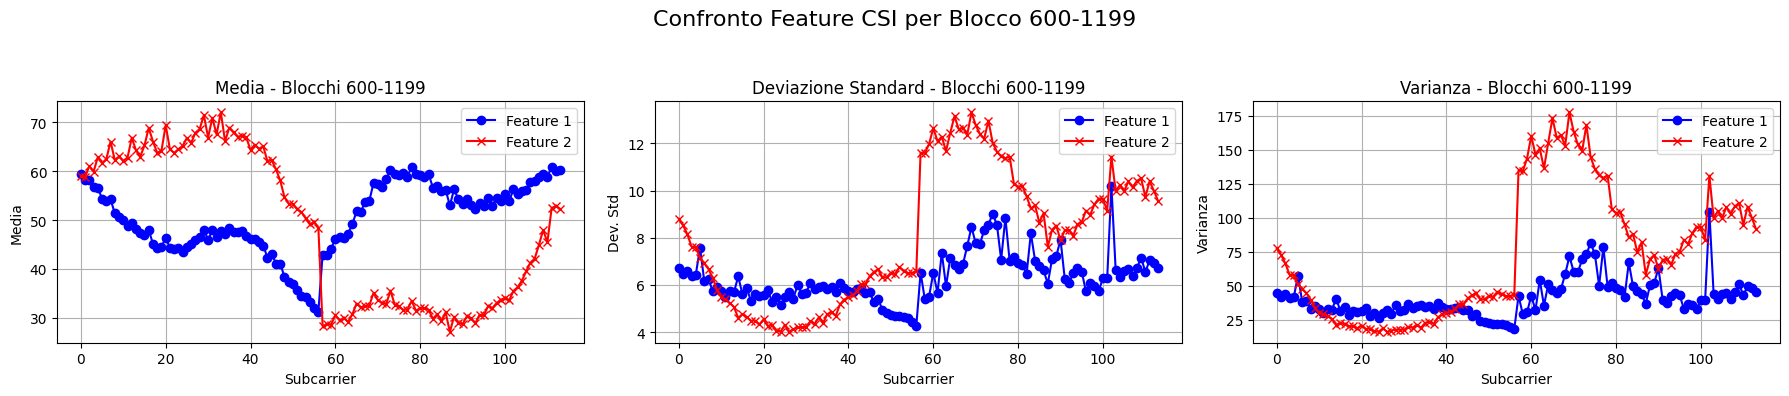

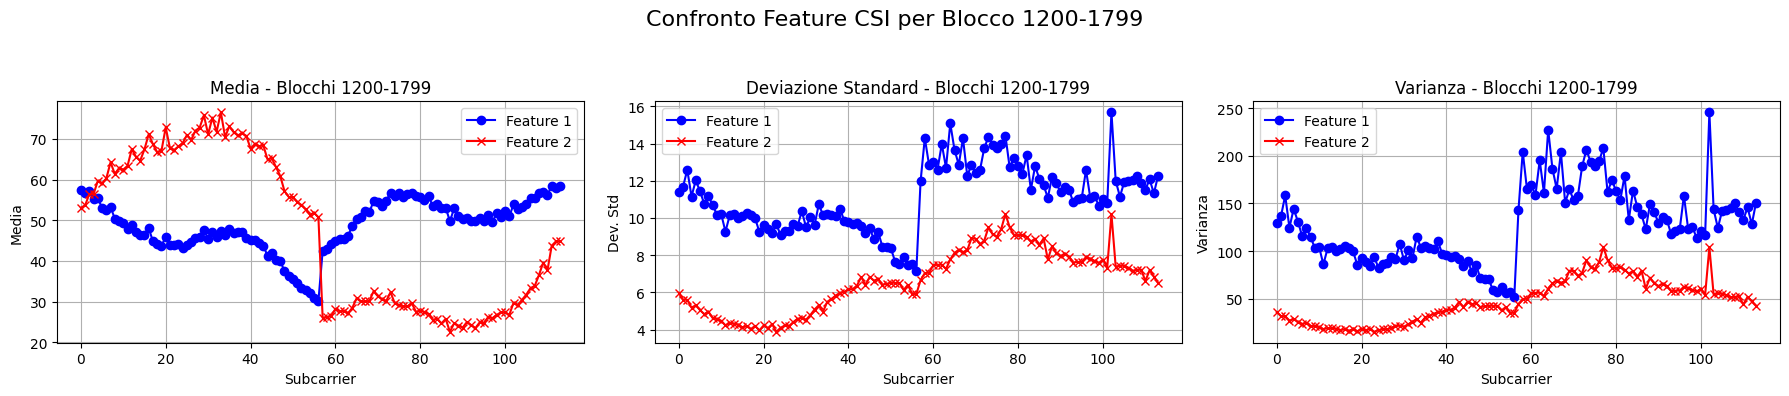

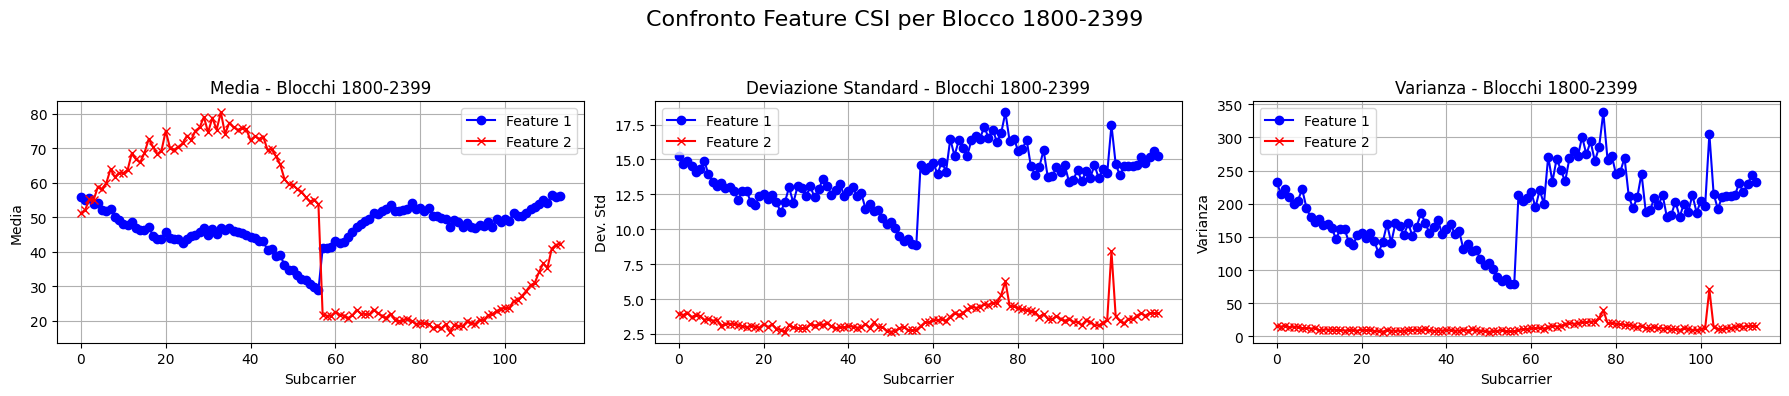

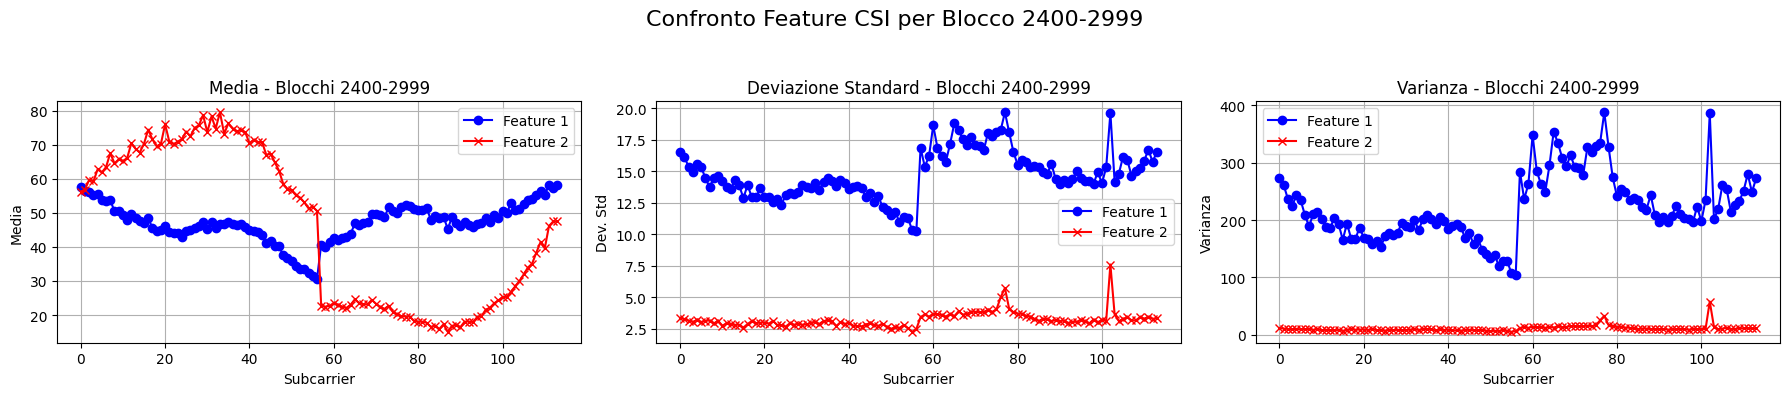

In [71]:
# Parametri
window_size = 600
step = 600

# Dataset da confrontare
df1 = df_duepersonefermeHTLTFvalid_mod
df2 = df_trepersoneinmovimentoHTLTFvalid_mod  

# Esegui su n blocchi
for i in range(5):
    start = i * step
    end = start + window_size
    block1 = df1.iloc[start:end]
    block2 = df2.iloc[start:end]

    # Calcola le feature per ogni subcarrier (colonna)
    mean1, std1, var1 = block1.mean(), block1.std(), block1.var()
    mean2, std2, var2 = block2.mean(), block2.std(), block2.var()

    # Crea i 3 plot per questo blocco
    fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True)

    # Media
    axes[0].plot(mean1.values, marker='o', label='Feature 1', color='blue')
    axes[0].plot(mean2.values, marker='x', label='Feature 2', color='red')
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    axes[1].plot(std1.values, marker='o', label='Feature 1', color='blue')
    axes[1].plot(std2.values, marker='x', label='Feature 2', color='red')
    axes[1].set_title(f"Deviazione Standard - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Dev. Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    axes[2].plot(var1.values, marker='o', label='Feature 1', color='blue')
    axes[2].plot(var2.values, marker='x', label='Feature 2', color='red')
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo generale e layout
    plt.suptitle(f"Confronto Feature CSI per Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


**matrice pem** 
la percentuale di elementi diversi da zero nella matrice CSI dilatata, che rappresenta la variazione dei canali wireless


Il numero di elementi non nulli nella matrice dilatata aumenta al crescere del numero di persone in movimento nell’ambiente. C’è una relazione monotona tra la PEM e il numero di persone. Questo significa che, man mano che la folla aumenta, anche il valore di PEM aumenta in maniera regolare 


PEM=numero di elementi diversi da 0/ numero totale di elementi *1000



In [72]:
CSI_matrix_absence = df_absence.applymap(lambda x: abs(complex(x)))
CSI_matrix_unapersona = df_unapersonaferma.applymap(lambda x: abs(complex(x)))
CSI_matrix_unapersona_movimento = df_unapersona_movimento.applymap(lambda x: abs(complex(x)))
CSI_matrix_duepersoneferme = df_duepersoneferme.applymap(lambda x: abs(complex(x)))
CSI_matrix_trepersoneinmovimento = df_trepersoneinmovimento.applymap(lambda x: abs(complex(x)))

C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\202877372.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  CSI_matrix_absence = df_absence.applymap(lambda x: abs(complex(x)))
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\202877372.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  CSI_matrix_unapersona = df_unapersonaferma.applymap(lambda x: abs(complex(x)))
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\202877372.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  CSI_matrix_unapersona_movimento = df_unapersona_movimento.applymap(lambda x: abs(complex(x)))
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\202877372.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  CSI_matrix_duepersoneferme = df_duepersoneferme.applymap(lambda x: abs(complex(x)))
C:\Users\mariu\AppData\Local\Temp\ipykernel_16880\202877372.py:5: FutureWar

In [73]:
threshold = 5.0
PEM_matrix = (CSI_matrix_absence > threshold).astype(int)
PEM_matrix_unapersona = (CSI_matrix_unapersona > threshold).astype(int)
PEM_matrix_unapersona_movimento = (CSI_matrix_unapersona_movimento > threshold).astype(int) 
PEM_matrix_duepersoneferme = (CSI_matrix_duepersoneferme > threshold).astype(int)
PEM_matrix_trepersoneinmovimento = (CSI_matrix_trepersoneinmovimento > threshold).astype(int)

In [74]:
PEM_value = (PEM_matrix.to_numpy().sum() / PEM_matrix.size) * 100
print(f"Valore PEM absence: {PEM_value:.2f}%")
PEM_value_unapersona = (PEM_matrix_unapersona.to_numpy().sum() / PEM_matrix_unapersona.size) * 100
print(f"Valore PEM Unapersona: {PEM_value_unapersona:.2f}%")    
PEM_value_unapersona_movimento = (PEM_matrix_unapersona_movimento.to_numpy().sum() / PEM_matrix_unapersona_movimento.size) * 100
print(f"Valore PEM Unapersona Movimento: {PEM_value_unapersona_movimento:.2f}%")    
PEM_value_duepersoneferme = (PEM_matrix_duepersoneferme.to_numpy().sum() / PEM_matrix_duepersoneferme.size) * 100
print(f"Valore PEM Due Persone Ferme: {PEM_value_duepersoneferme:.2f}%")
PEM_value_trepersoneinmovimento = (PEM_matrix_trepersoneinmovimento.to_numpy().sum() / PEM_matrix_trepersoneinmovimento.size) * 100
print(f"Valore PEM Tre Persone in Movimento: {PEM_value_trepersoneinmovimento:.2f}%")


Valore PEM absence: 86.39%
Valore PEM Unapersona: 84.51%
Valore PEM Unapersona Movimento: 84.00%
Valore PEM Due Persone Ferme: 80.91%
Valore PEM Tre Persone in Movimento: 85.13%


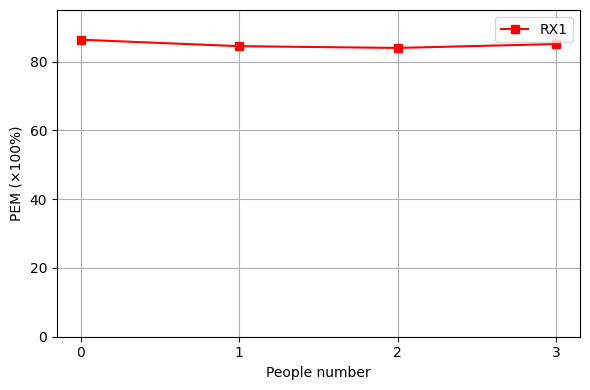

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Calcolo delle medie PEM per ciascun scenario
people = [0, 1, 2, 3]
pem_mean = [
    np.mean(PEM_value),
    np.mean(PEM_value_unapersona),
    np.mean(PEM_value_unapersona_movimento),
    np.mean(PEM_value_trepersoneinmovimento),
]

# Plot stile articolo
plt.figure(figsize=(6, 4))
plt.plot(people, pem_mean, marker='s', linestyle='-', color='red', label='RX1')

plt.xlabel("People number")
plt.ylabel("PEM (×100%)")
plt.ylim(0, max(pem_mean)*1.1)
plt.xticks(people)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


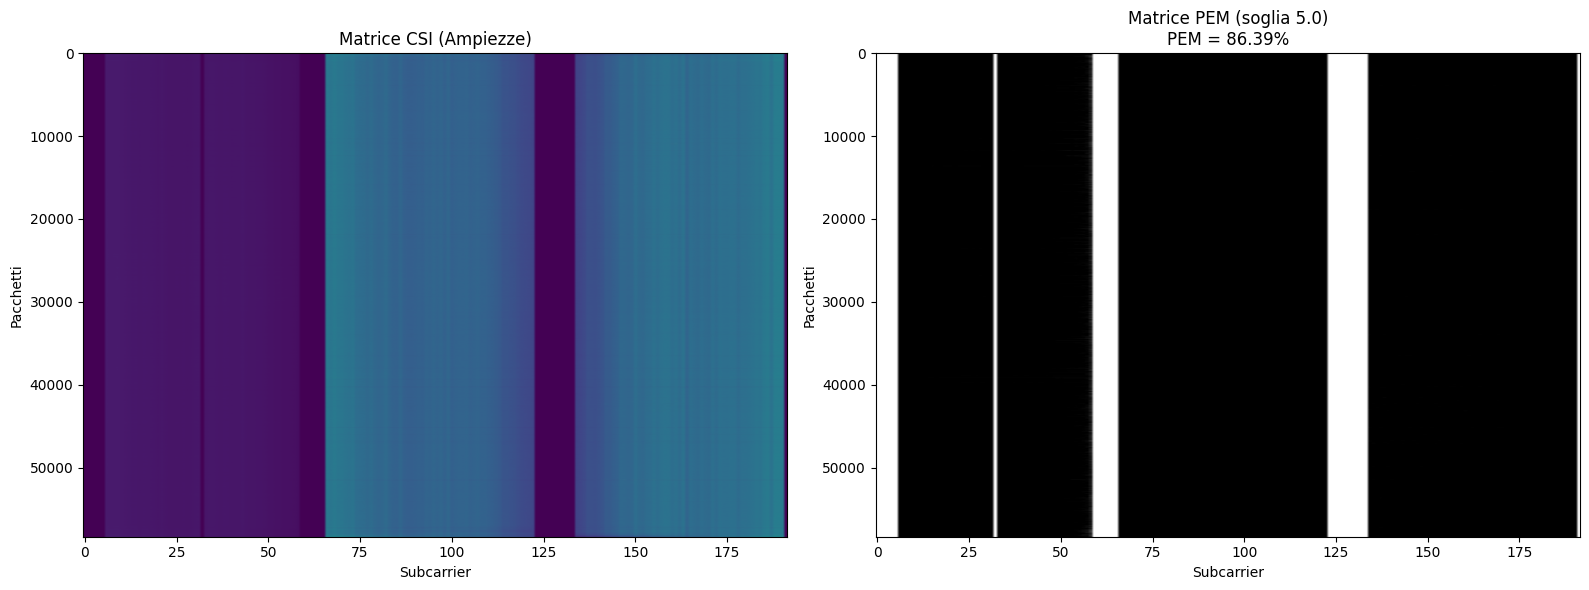

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

axs[0].imshow(CSI_matrix_absence, cmap='viridis', aspect='auto')
axs[0].set_title('Matrice CSI (Ampiezze)')
axs[0].set_xlabel('Subcarrier')
axs[0].set_ylabel('Pacchetti')

axs[1].imshow(PEM_matrix, cmap='gray_r', aspect='auto')
axs[1].set_title(f'Matrice PEM (soglia {threshold})\nPEM = {PEM_value:.2f}%')
axs[1].set_xlabel('Subcarrier')
axs[1].set_ylabel('Pacchetti')

plt.tight_layout()
plt.show()
# Parametri
window_size = 10       # Numero di pacchetti per finestra
threshold = 5.0         # Soglia per binarizzazione del PEM

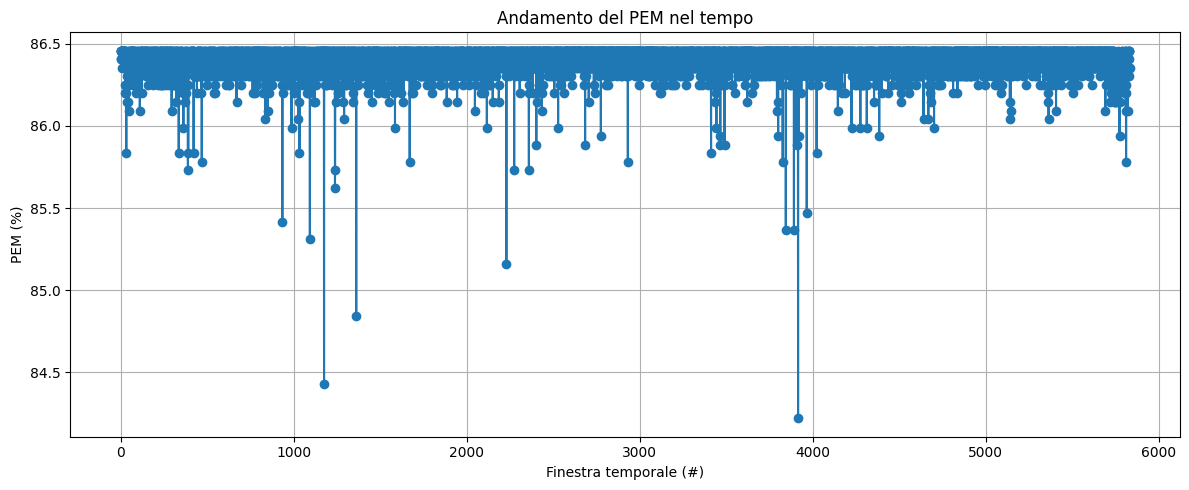

In [77]:
# Parametri
window_size = 10       # Numero di pacchetti per finestra
threshold = 5.0         # Soglia per binarizzazione del PEM

# Numero di finestre temporali
num_windows = CSI_matrix_absence.shape[0] // window_size

# === CALCOLO PEM PER OGNI FINESTRA ===
PEM_per_window = []
for i in range(num_windows):
    window = CSI_matrix_absence.iloc[i * window_size:(i + 1) * window_size]
    bin_matrix = (window > threshold).astype(int)
    pem_value = bin_matrix.to_numpy().sum() / bin_matrix.size * 100
    PEM_per_window.append(pem_value)

# === GRAFICO ===
plt.figure(figsize=(12, 5))
plt.plot(PEM_per_window, marker='o', linestyle='-')
plt.title("Andamento del PEM nel tempo")
plt.xlabel("Finestra temporale (#)")
plt.ylabel("PEM (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

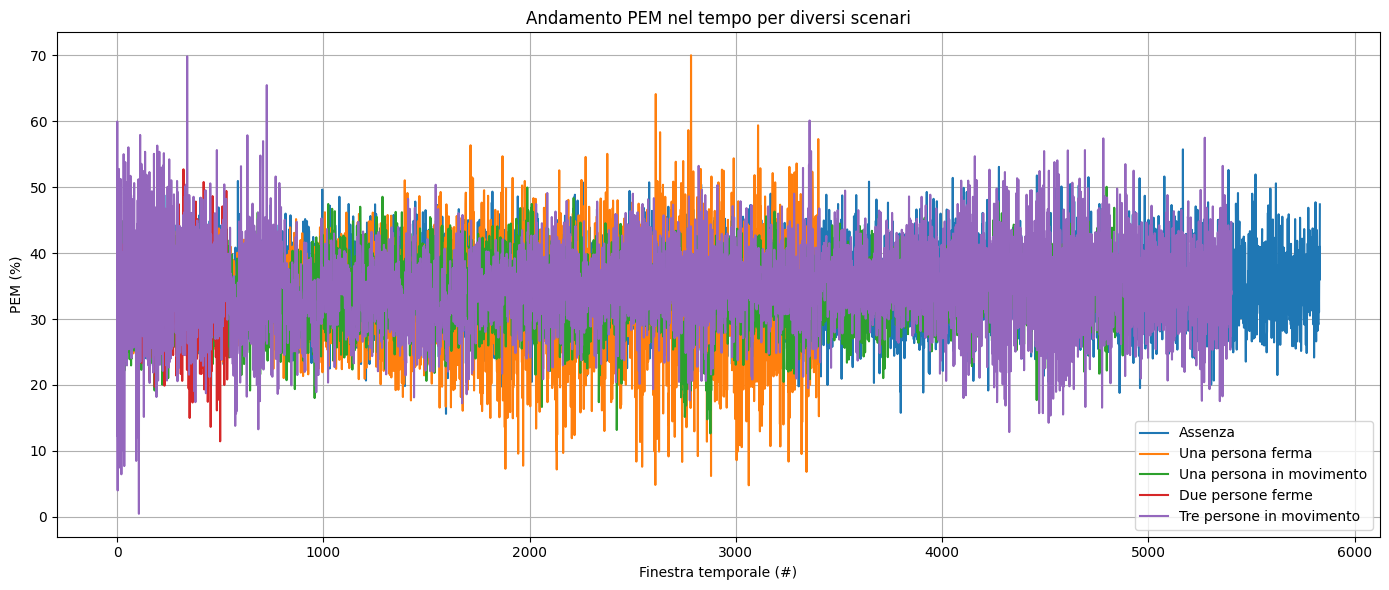

In [78]:
import matplotlib.pyplot as plt

# Parametri
window_size = 10
threshold = 5.0

def compute_pem_series(df, window_size=10, threshold=5.0):
    pem_series = []
    num_windows = df.shape[0] // window_size
    for i in range(num_windows):
        window = df.iloc[i * window_size:(i + 1) * window_size]
        bin_matrix = (window > threshold).astype(int)
        pem_value = bin_matrix.to_numpy().sum() / bin_matrix.size * 100
        pem_series.append(pem_value)
    return pem_series

# Calcolo PEM temporale per ciascuno scenario
pem_absence = compute_pem_series(df_absence, window_size, threshold)
pem_unapersonaferma = compute_pem_series(df_unapersonaferma, window_size, threshold)
pem_unapersona_movimento = compute_pem_series(df_unapersona_movimento, window_size, threshold)
pem_duepersoneferme = compute_pem_series(df_duepersoneferme, window_size, threshold)
pem_trepersoneinmovimento = compute_pem_series(df_trepersoneinmovimento, window_size, threshold)

# === GRAFICO COMPARATIVO ===
plt.figure(figsize=(14, 6))

plt.plot(pem_absence, label='Assenza')
plt.plot(pem_unapersonaferma, label='Una persona ferma')
plt.plot(pem_unapersona_movimento, label='Una persona in movimento')
plt.plot(pem_duepersoneferme, label='Due persone ferme')
plt.plot(pem_trepersoneinmovimento, label='Tre persone in movimento')

plt.title("Andamento PEM nel tempo per diversi scenari")
plt.xlabel("Finestra temporale (#)")
plt.ylabel("PEM (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


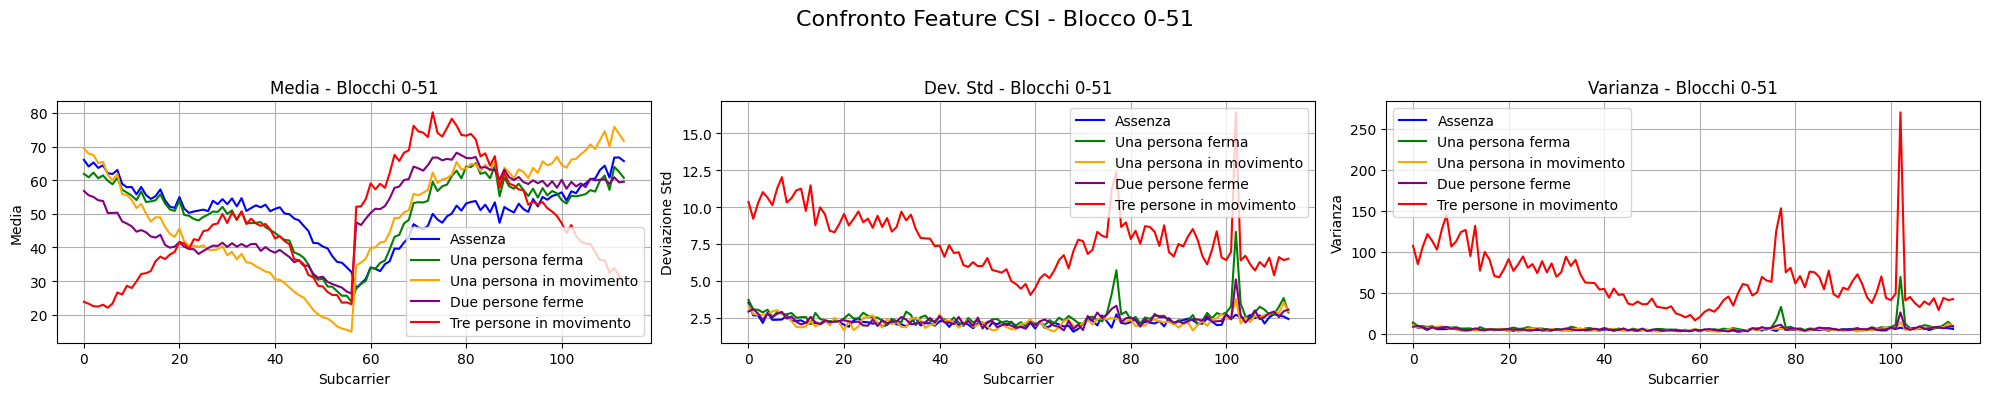

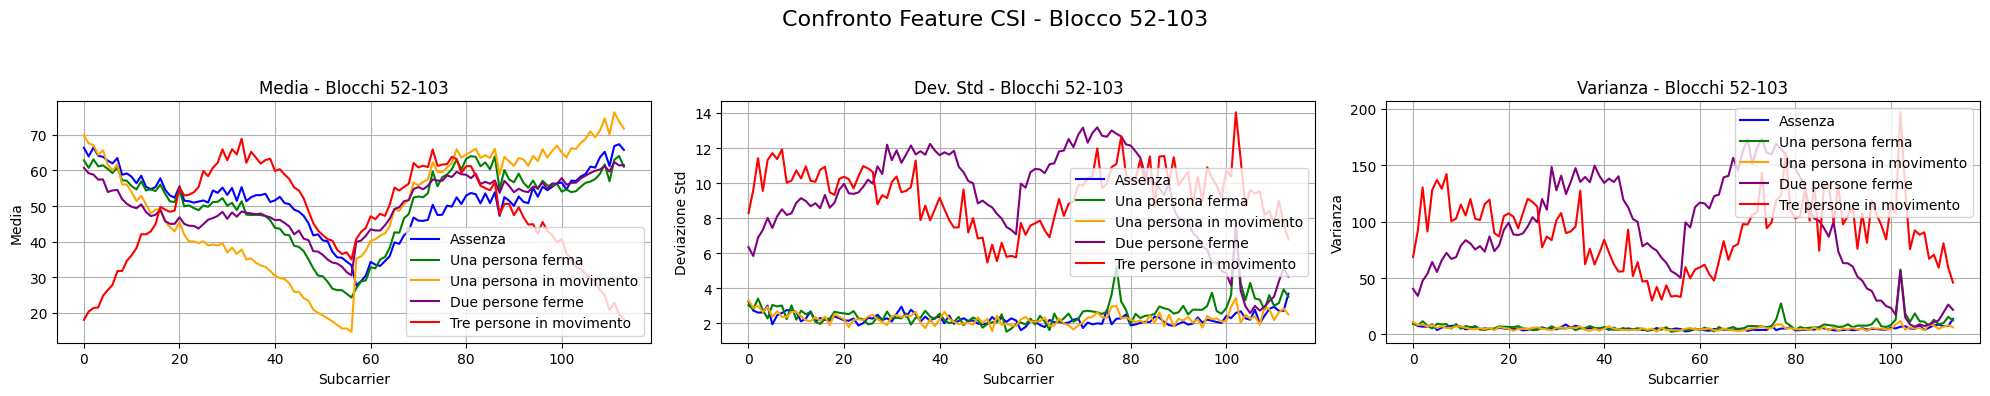

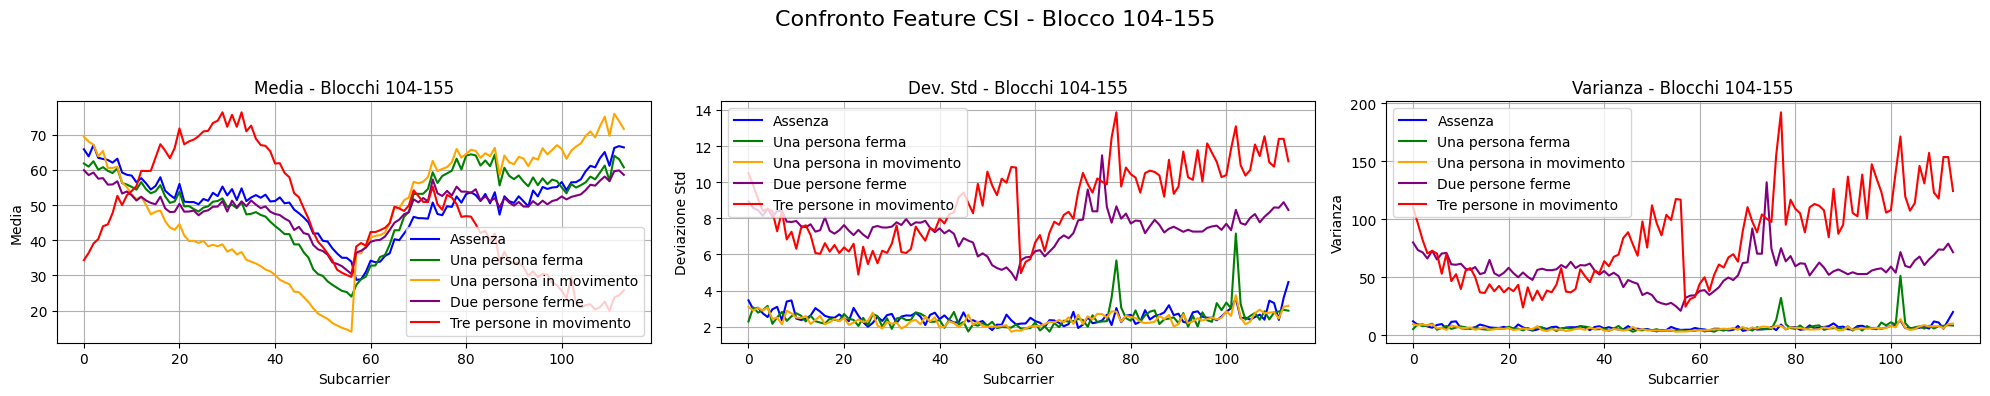

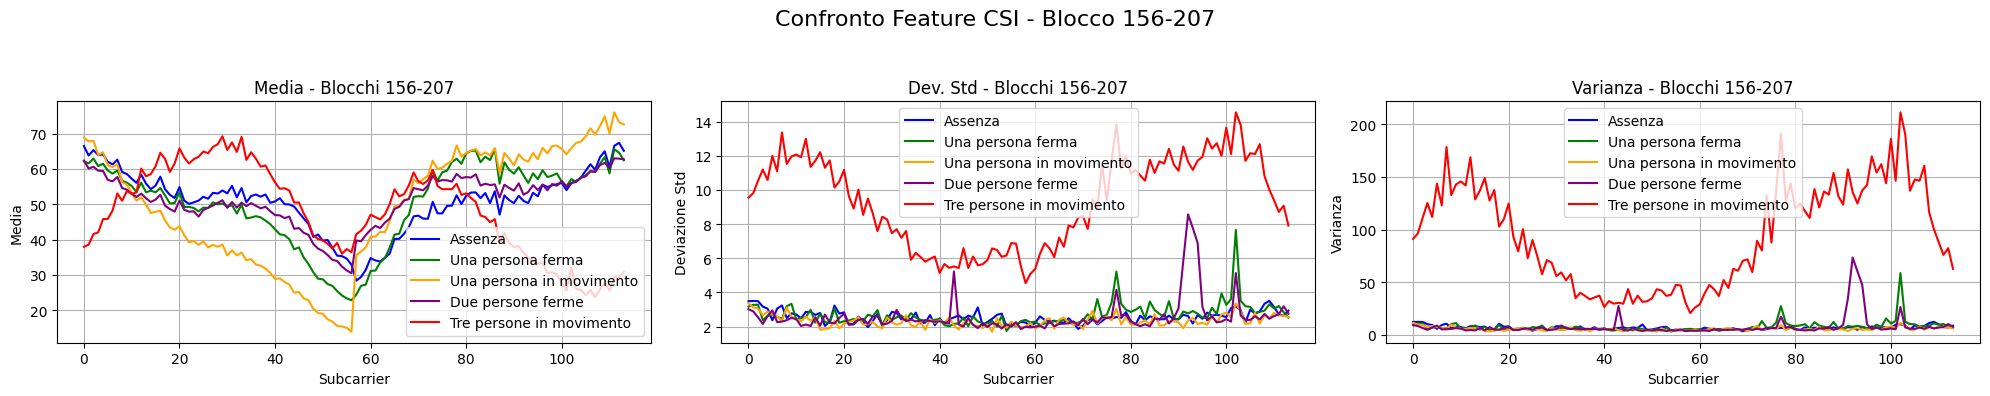

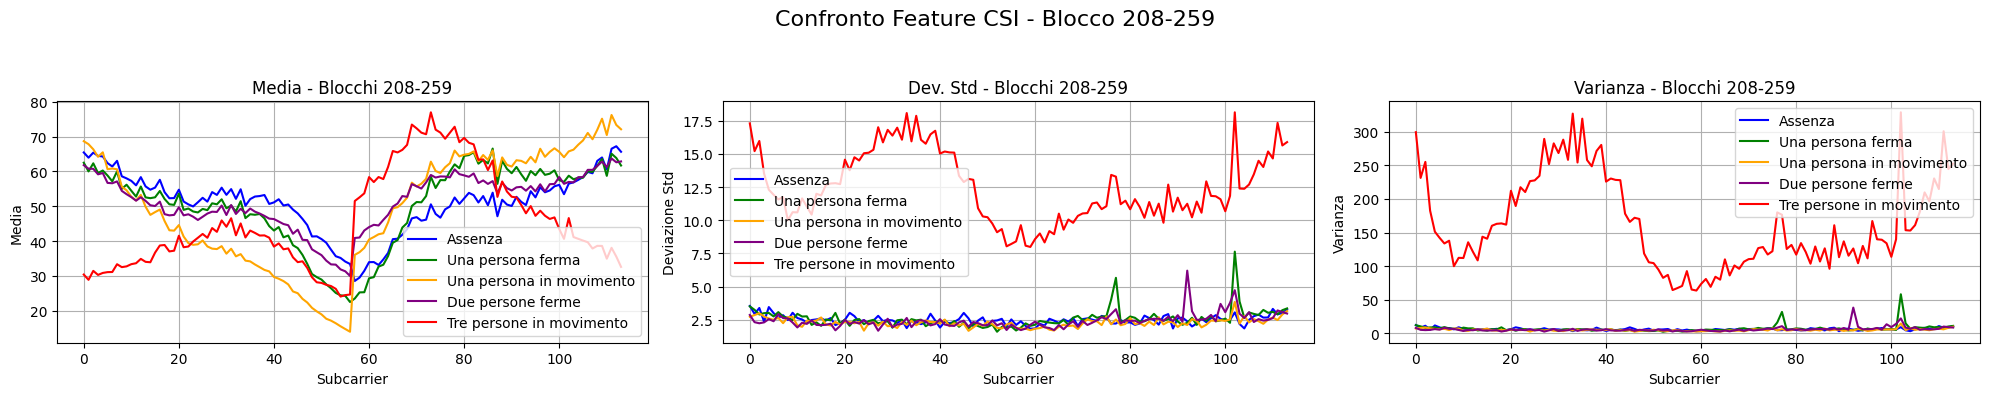

In [79]:
import matplotlib.pyplot as plt

# Parametri
window_size = 52
step = 52

n_blocchi = 5

# Dizionario dei dataset
dataset_dict = {
    "Assenza": df_absenceHTLTFvalid_mod,
    "Una persona ferma": df_unapersonafermaHTLTFvalid_mod,
    "Una persona in movimento": df_unapersona_movimentoHTLTFvalid_mod,
    "Due persone ferme": df_duepersonefermeHTLTFvalid_mod,
    "Tre persone in movimento": df_trepersoneinmovimentoHTLTFvalid_mod
}

# Colori distinti per ogni dataset
colori = ['blue', 'green', 'orange', 'purple', 'red']

# Loop sui blocchi
for i in range(n_blocchi):
    start = i * step
    end = start + window_size

    # Dizionari per memorizzare le feature di ogni dataset
    medie = {}
    deviazioni = {}
    varianze = {}

    for (label, df) in dataset_dict.items():
        blocco = df.iloc[start:end]
        medie[label] = blocco.mean()
        deviazioni[label] = blocco.std()
        varianze[label] = blocco.var()

    # Creazione dei plot
    fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharex=True)

    # Media
    for j, (label, valori) in enumerate(medie.items()):
        axes[0].plot(valori.values, label=label, color=colori[j])
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    for j, (label, valori) in enumerate(deviazioni.items()):
        axes[1].plot(valori.values, label=label, color=colori[j])
    axes[1].set_title(f"Dev. Std - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Deviazione Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    for j, (label, valori) in enumerate(varianze.items()):
        axes[2].plot(valori.values, label=label, color=colori[j])
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo generale
    plt.suptitle(f"Confronto Feature CSI - Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


**una persona ferma sessione 2**

In [80]:
#leggo csv
df_unapersona_ferma2= pd.read_csv('DATI/csi_data_unapersonafermaconorario.csv')

In [81]:
df_unapersona_ferma2.isnull().sum()

type                 0
id                   0
mac                  0
rssi                 0
rate                 0
sig_mode             0
mcs                  0
bandwidth            0
smoothing            0
not_sounding         0
aggregation          0
stbc                 0
fec_coding           0
sgi                  0
noise_floor          0
ampdu_cnt            0
channel              0
secondary_channel    0
local_timestamp      0
ant                  0
sig_len              0
rx_state             0
len                  0
first_word           0
data                 0
dtype: int64

In [82]:
csi_unapersonaferma2= pd.DataFrame(df_unapersona_ferma2['data'])

csi_unapersonaferma2['csi_complex'] = csi_unapersonaferma2['data'].apply(convert_csi_data)

In [83]:
check_column_lengths(csi_unapersonaferma2, 'csi_complex')

Tutte le righe nella colonna 'csi_complex' hanno la stessa lunghezza? True


In [84]:
unapersonaferma2= pd.DataFrame(csi_unapersonaferma2['csi_complex'].tolist())
unapersonaferma2HTLTF = unapersonaferma2.iloc[:, 64:192]

In [85]:
unapersonaferma2HTLTF

64        65          66          67          68          69   \
0      0.0+0.0j  0.0+0.0j -34.0+45.0j -32.0+41.0j -41.0+42.0j -35.0+34.0j   
1      0.0+0.0j  0.0+0.0j  -5.0-50.0j -16.0-59.0j -14.0-48.0j  -7.0-49.0j   
2      0.0+0.0j  0.0+0.0j  57.0+ 2.0j  49.0+ 5.0j  47.0+10.0j  44.0+11.0j   
3      0.0+0.0j  0.0+0.0j -23.0+47.0j -17.0+41.0j -21.0+43.0j -25.0+44.0j   
4      0.0+0.0j  0.0+0.0j -53.0-22.0j -40.0-14.0j -43.0-32.0j -46.0-20.0j   
...         ...       ...         ...         ...         ...         ...   
32340  0.0+0.0j  0.0+0.0j -24.0- 6.0j -22.0- 2.0j -24.0- 6.0j -23.0- 6.0j   
32341  0.0+0.0j  0.0+0.0j -26.0+ 6.0j -23.0+ 6.0j -24.0+ 1.0j -24.0+ 0.0j   
32342  0.0+0.0j  0.0+0.0j  21.0+ 3.0j  24.0+ 0.0j  18.0+ 2.0j  18.0+ 1.0j   
32343  0.0+0.0j  0.0+0.0j -27.0+ 6.0j -21.0+ 2.0j -25.0+ 2.0j -18.0+ 1.0j   
32344  0.0+0.0j  0.0+0.0j  -7.0-22.0j  -6.0-28.0j  -1.0-24.0j  -1.0-23.0j   

              70          71          72          73   ...         182  \
0     -32.0+39.0j -31.0+42.0j -35.0+32.0j -32.0+42.0j  ...  50.0+20.0j   
1       3.0-54.0j  -1.0-48.0j   2.0-47.0j   0.0-51.0j  ... -48.0+10.0j   
2      51.0+ 5.0j  50.0+ 3.0j  49.0+ 8.0j  51.0+ 6.0j  ...  -5.0-49.0j   
3     -26.0+44.0j -26.0+41.0j -27.0+40.0j -31.0+45.0j  ...  43.0+13.0j   
4     -42.0-26.0j -44.0-24.0j -39.0-33.0j -46.0-32.0j  ... -19.0+46.0j   
...           ...         ...         ...         ...  ...         ...   
32340 -22.0- 3.0j -22.0- 4.0j -19.0- 5.0j -22.0- 7.0j  ...  -3.0+29.0j   
32341 -23.0+ 4.0j -21.0+ 3.0j -20.0+ 0.0j -21.0+ 1.0j  ...   8.0+28.0j   
32342  22.0+ 3.0j  20.0+ 3.0j  18.0+ 4.0j  18.0+ 3.0j  ...  -2.0-32.0j   
32343 -24.0+ 3.0j -21.0+ 3.0j -22.0+ 1.0j -23.0+ 1.0j  ...  11.0+28.0j   
32344   3.0-22.0j   4.0-20.0j   3.0-22.0j   4.0-19.0j  ... -31.0+ 1.0j   

              183         184         185         186         187         188  \
0      50.0+19.0j  48.0+20.0j  43.0+22.0j  48.0+22.0j  40.0+31.0j  47.0+35.0j   
1     -47.0+14.0j -53.0+ 7.0j -52.0+10.0j -57.0+ 8.0j -50.0+ 9.0j -55.0+16.0j   
2     -10.0-51.0j  -6.0-54.0j  -3.0-54.0j  -6.0-57.0j  -4.0-48.0j   0.0-53.0j   
3      49.0+11.0j  48.0+16.0j  47.0+16.0j  51.0+19.0j  48.0+14.0j  46.0+16.0j   
4     -18.0+46.0j -20.0+45.0j -18.0+49.0j -21.0+51.0j -20.0+40.0j -16.0+54.0j   
...           ...         ...         ...         ...         ...         ...   
32340  -2.0+31.0j  -3.0+29.0j  -3.0+28.0j  -3.0+28.0j  -5.0+28.0j  -4.0+28.0j   
32341   9.0+29.0j   9.0+25.0j   7.0+26.0j   7.0+26.0j   5.0+31.0j   4.0+32.0j   
32342  -3.0-32.0j  -2.0-30.0j   0.0-32.0j  -1.0-32.0j   3.0-28.0j   1.0-30.0j   
32343  11.0+27.0j   9.0+26.0j  13.0+26.0j  10.0+28.0j   8.0+24.0j   9.0+29.0j   
32344 -30.0- 1.0j -29.0- 1.0j -31.0+ 0.0j -31.0+ 0.0j -27.0+ 4.0j -27.0+ 4.0j   

              189         190       191  
0      50.0+38.0j  38.0+33.0j  0.0+0.0j  
1     -59.0+14.0j -55.0+13.0j  0.0+0.0j  
2      -1.0-59.0j   3.0-47.0j  0.0+0.0j  
3      46.0+16.0j  47.0+24.0j  0.0+0.0j  
4     -20.0+48.0j -17.0+45.0j  0.0+0.0j  
...           ...         ...       ...  
32340  -7.0+26.0j  -3.0+26.0j  0.0+0.0j  
32341   3.0+28.0j   6.0+25.0j  0.0+0.0j  
32342   1.0-27.0j   1.0-30.0j  0.0+0.0j  
32343   9.0+27.0j   7.0+28.0j  0.0+0.0j  
32344 -29.0+ 3.0j -24.0+ 4.0j  0.0+0.0j  

[32345 rows x 128 columns]

In [86]:
unapersona_ferma2HTLFvalid=unapersonaferma2HTLTF.loc[:, (unapersonaferma2HTLTF != 0).any(axis=0)]
unapersona_ferma2HTLTF_mod = np.abs(unapersona_ferma2HTLFvalid)

In [87]:
feature_unapersonaferma2 = unapersona_ferma2HTLTF_mod.apply(extract_features, axis=0).T

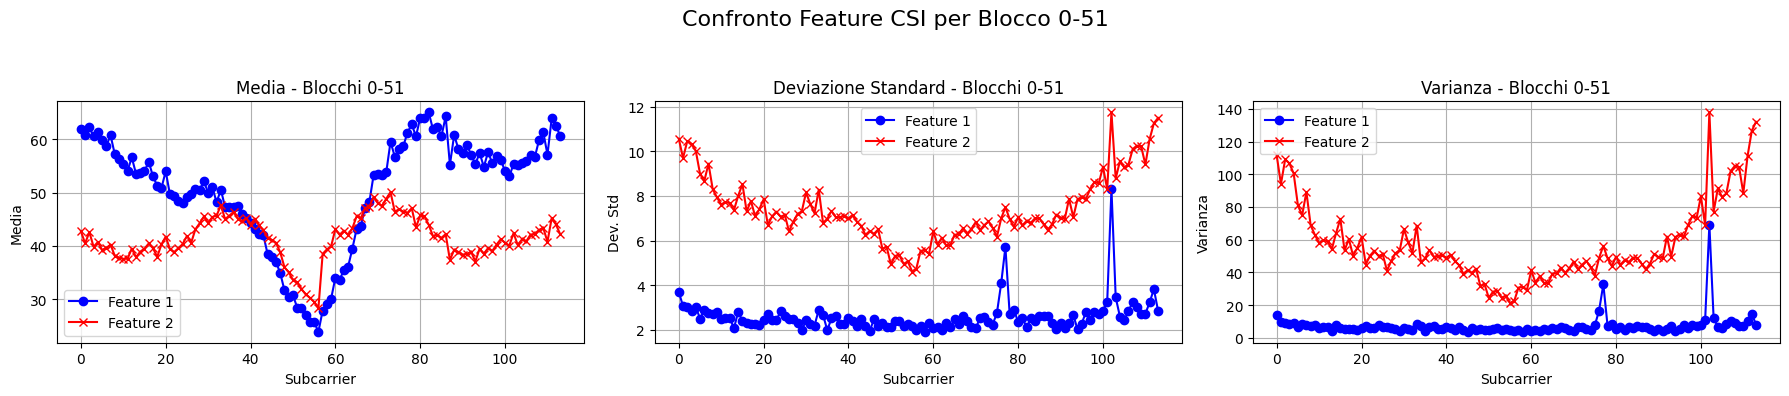

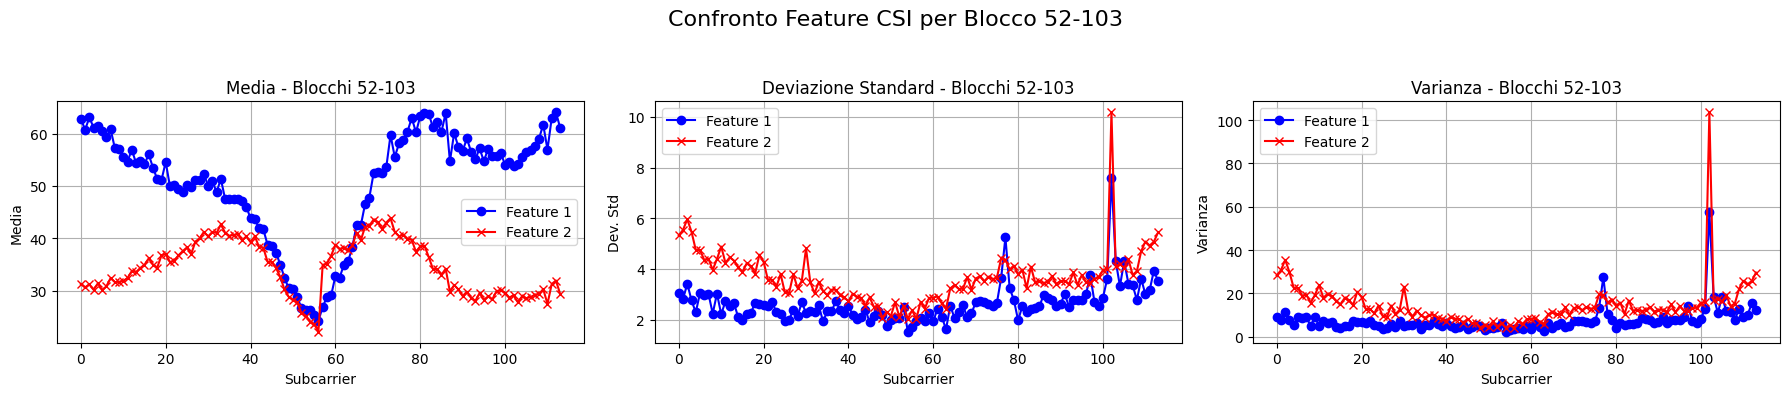

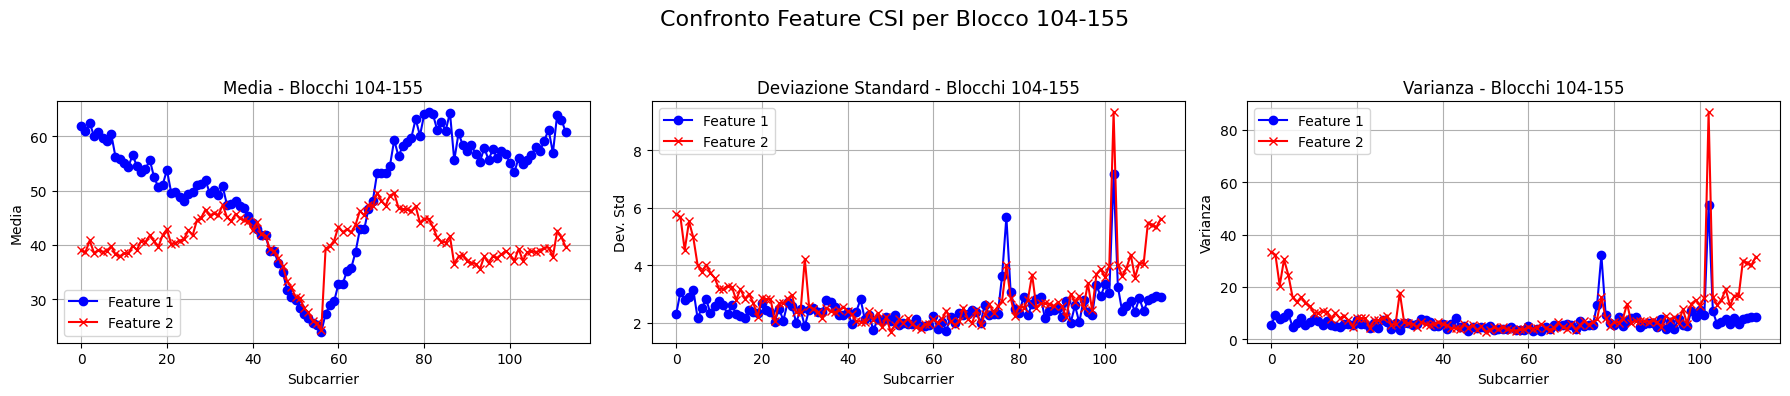

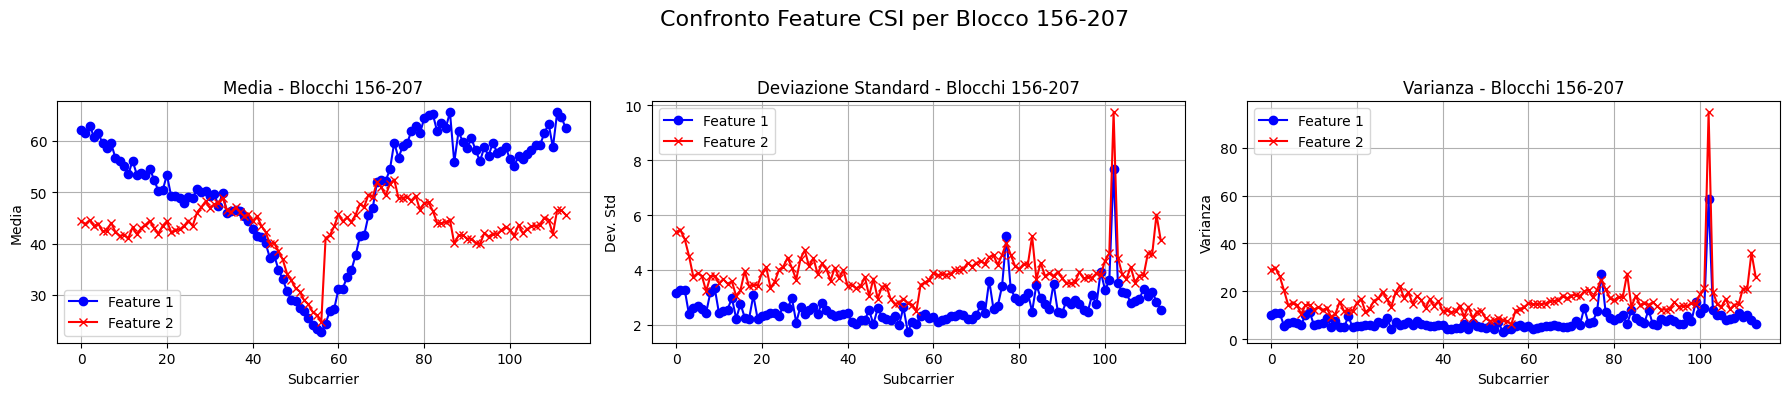

In [88]:
# Parametri
window_size = 52
step = 52

# Dataset da confrontare
df1 = df_unapersonafermaHTLTFvalid_mod
df2 = unapersona_ferma2HTLTF_mod 

# Esegui su n blocchi
for i in range(4):
    start = i * step
    end = start + window_size
    block1 = df1.iloc[start:end]
    block2 = df2.iloc[start:end]

    # Calcola le feature per ogni subcarrier (colonna)
    mean1, std1, var1 = block1.mean(), block1.std(), block1.var()
    mean2, std2, var2 = block2.mean(), block2.std(), block2.var()

    # Crea i 3 plot per questo blocco
    fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True)

    # Media
    axes[0].plot(mean1.values, marker='o', label='Feature 1', color='blue')
    axes[0].plot(mean2.values, marker='x', label='Feature 2', color='red')
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    axes[1].plot(std1.values, marker='o', label='Feature 1', color='blue')
    axes[1].plot(std2.values, marker='x', label='Feature 2', color='red')
    axes[1].set_title(f"Deviazione Standard - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Dev. Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    axes[2].plot(var1.values, marker='o', label='Feature 1', color='blue')
    axes[2].plot(var2.values, marker='x', label='Feature 2', color='red')
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo generale e layout
    plt.suptitle(f"Confronto Feature CSI per Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


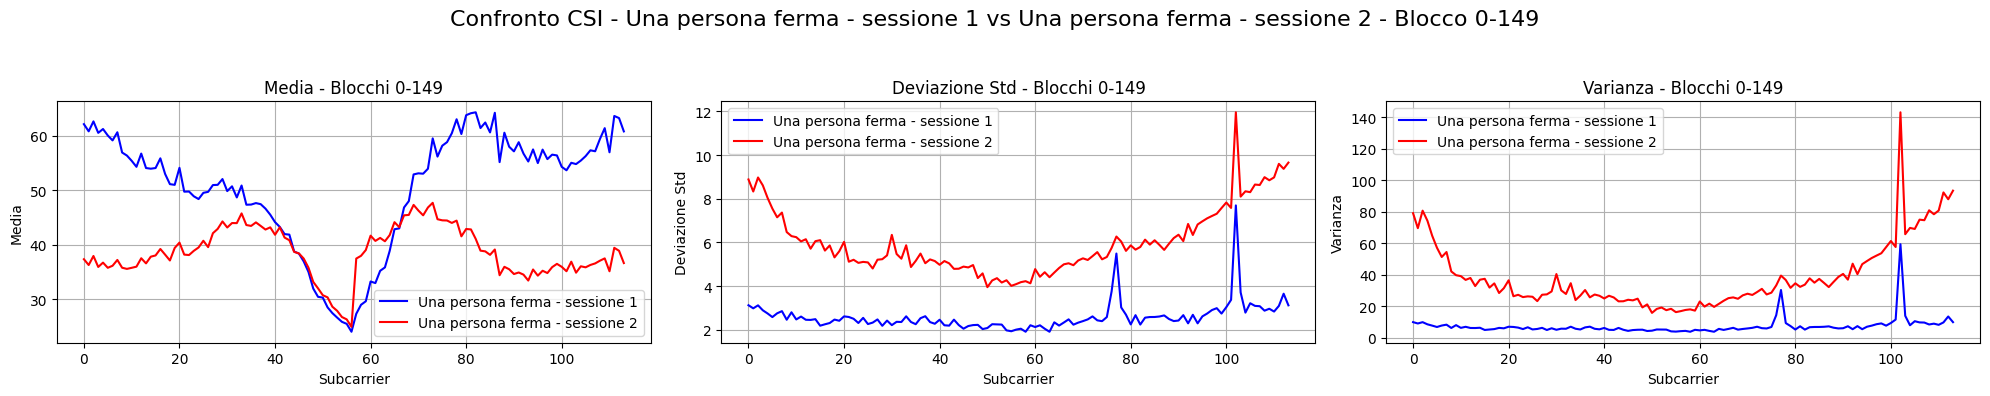

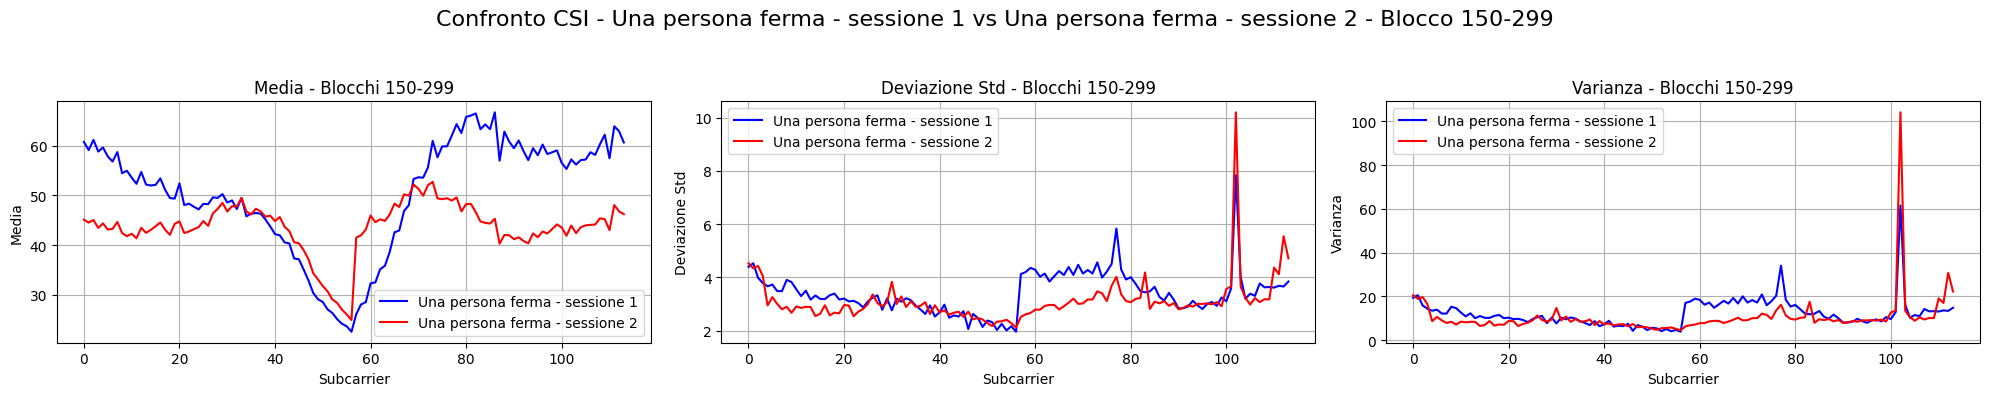

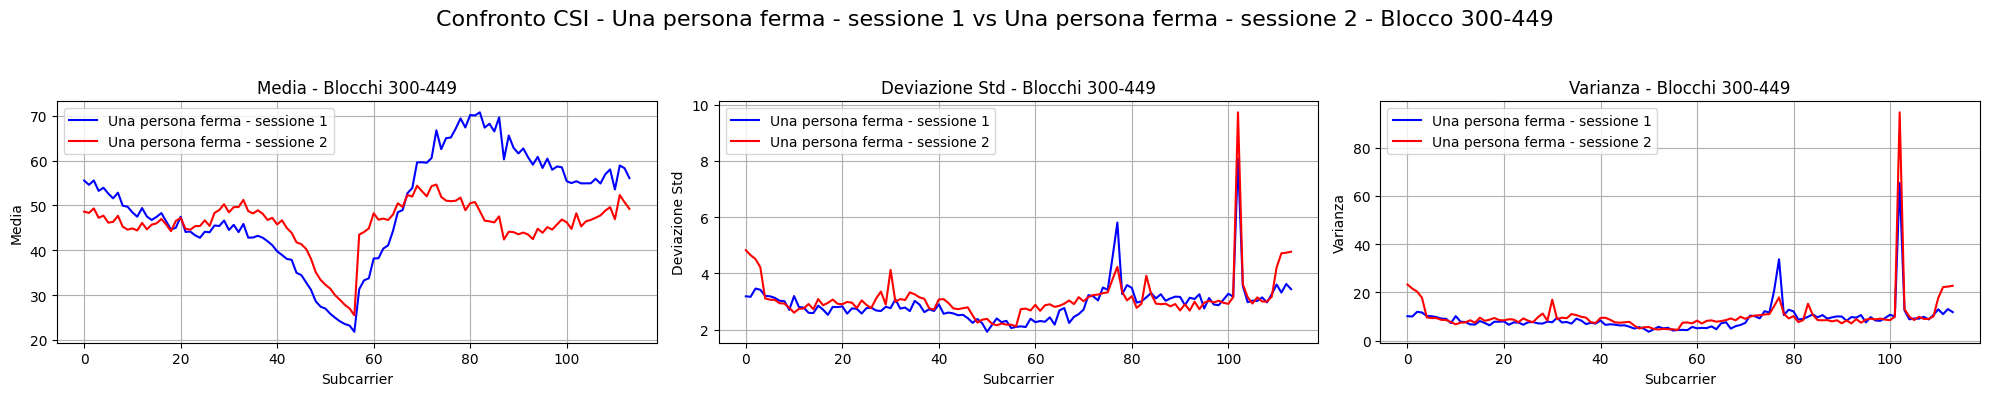

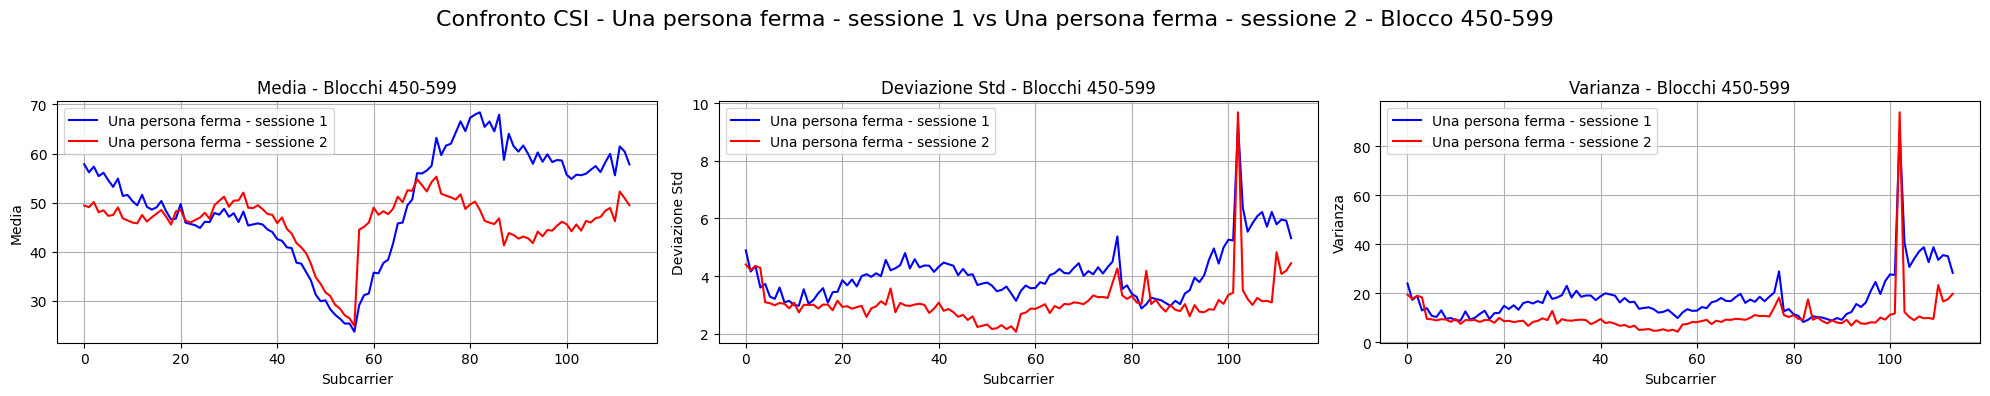

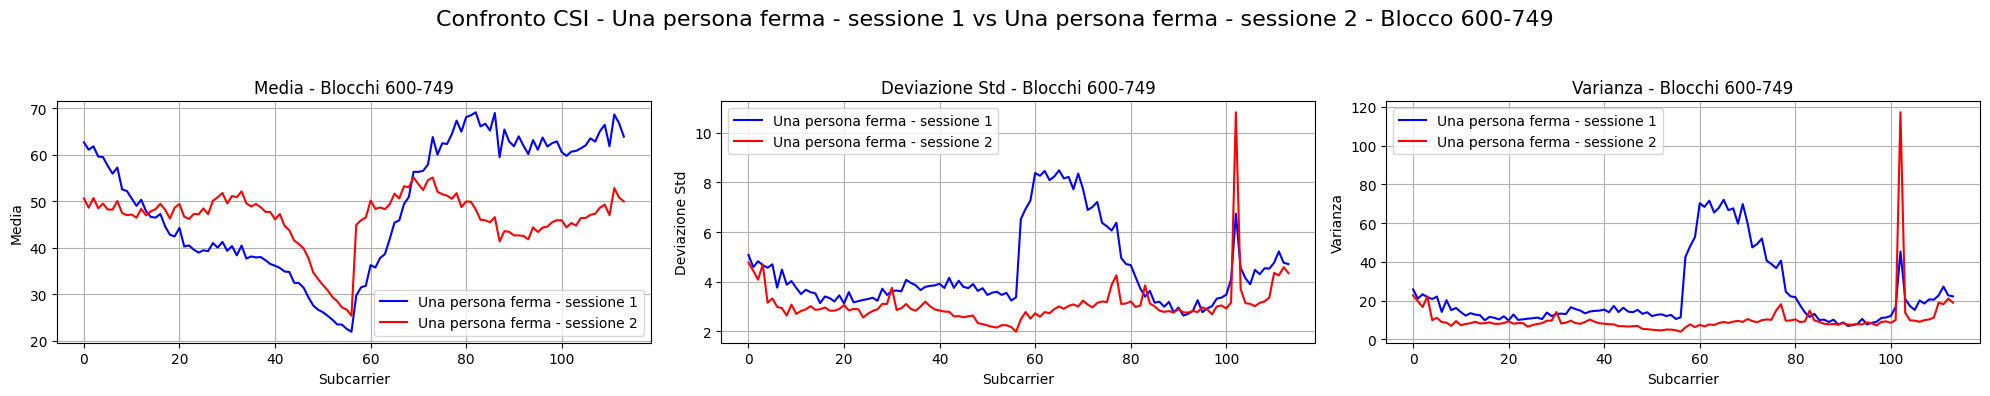

In [89]:
import matplotlib.pyplot as plt

# Parametri
window_size = 150
step = 150
n_blocchi = 5

# Dataset da confrontare
df1 = df_unapersonafermaHTLTFvalid_mod
df2 = unapersona_ferma2HTLTF_mod

# Etichette
label1 = "Una persona ferma - sessione 1"
label2 = "Una persona ferma - sessione 2"

# Colori
colori = ['blue', 'red']

# Loop sui blocchi
for i in range(n_blocchi):
    start = i * step
    end = start + window_size

    # Estrai blocchi
    blocco1 = df1.iloc[start:end]
    blocco2 = df2.iloc[start:end]

    # Calcola feature
    media1, devstd1, varianza1 = blocco1.mean(), blocco1.std(), blocco1.var()
    media2, devstd2, varianza2 = blocco2.mean(), blocco2.std(), blocco2.var()

    # Plot
    fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharex=True)

    # Media
    axes[0].plot(media1.values, label=label1, color=colori[0])
    axes[0].plot(media2.values, label=label2, color=colori[1])
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    axes[1].plot(devstd1.values, label=label1, color=colori[0])
    axes[1].plot(devstd2.values, label=label2, color=colori[1])
    axes[1].set_title(f"Deviazione Std - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Deviazione Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    axes[2].plot(varianza1.values, label=label1, color=colori[0])
    axes[2].plot(varianza2.values, label=label2, color=colori[1])
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo complessivo
    plt.suptitle(f"Confronto CSI - {label1} vs {label2} - Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


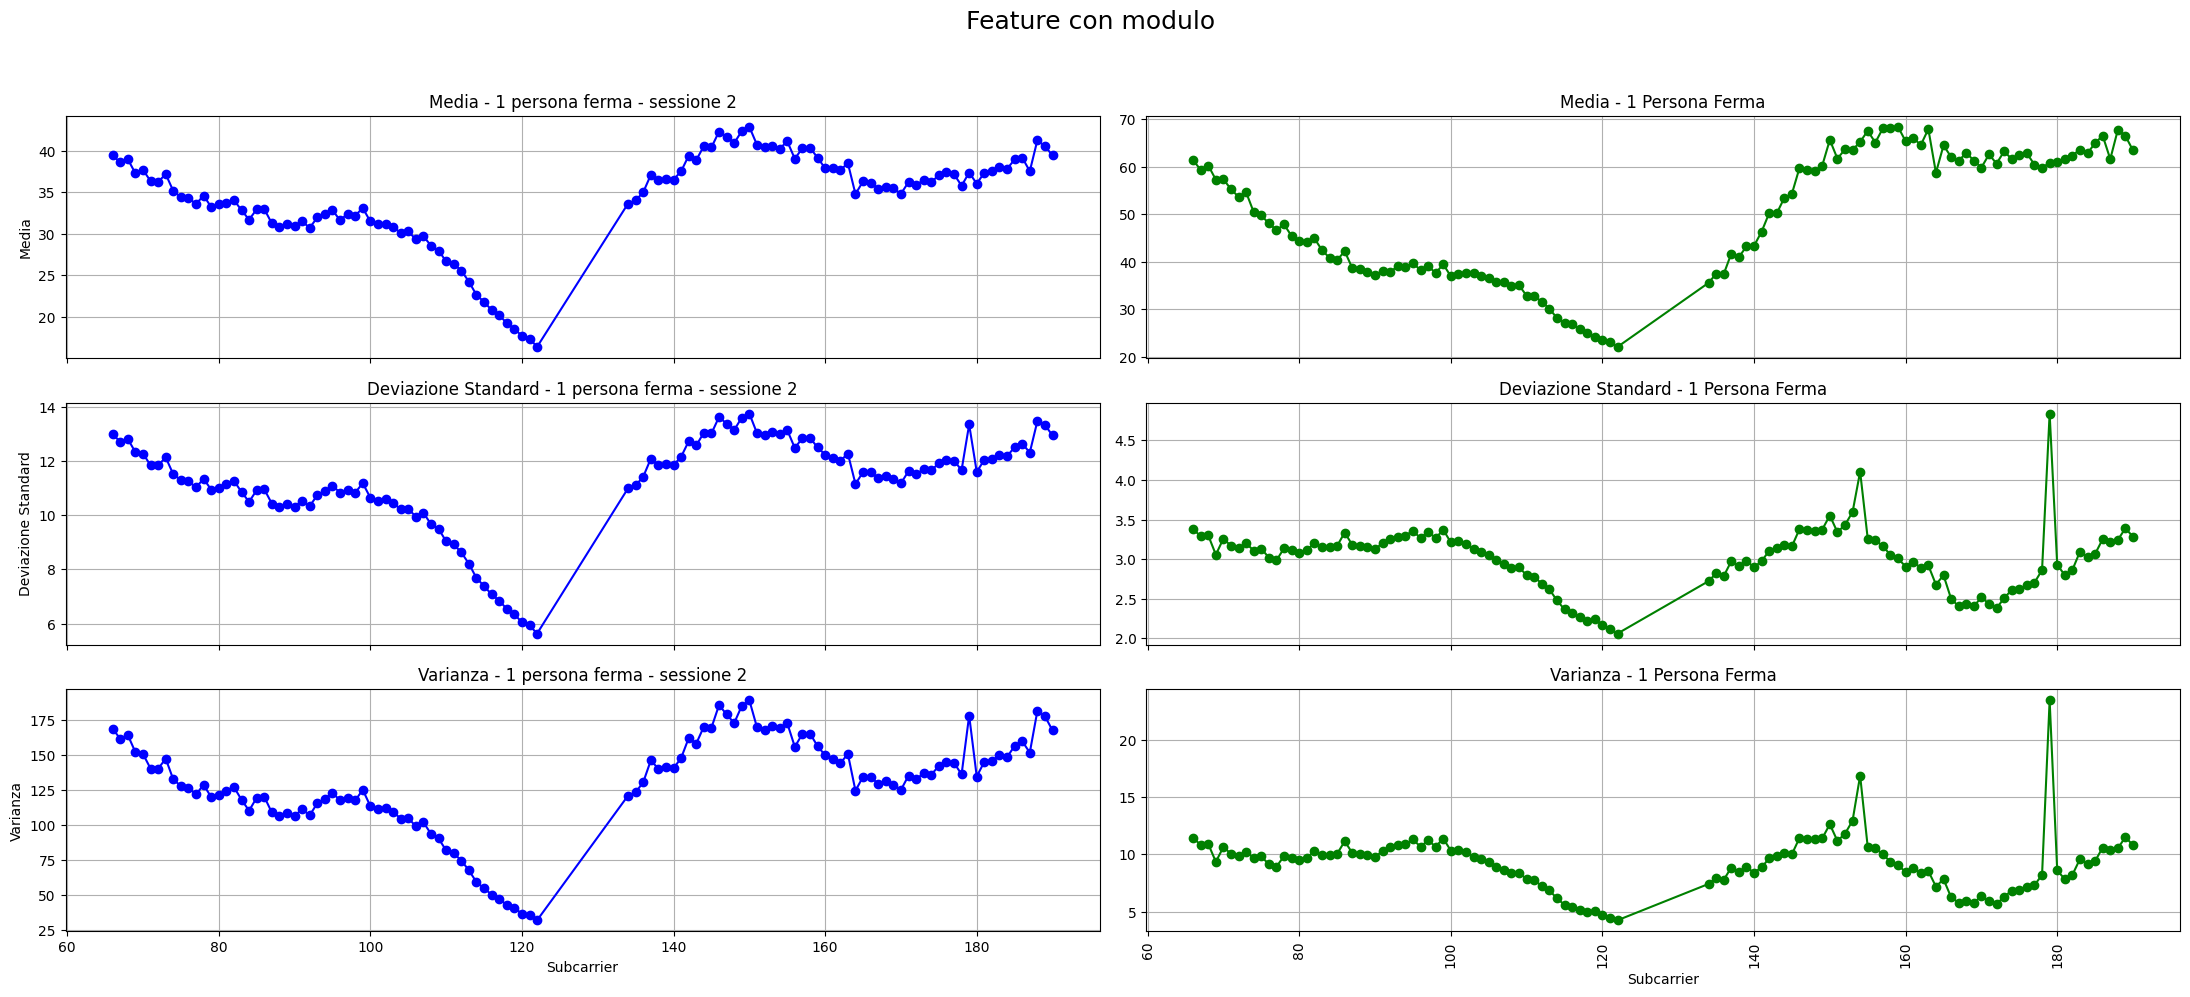

In [90]:
import matplotlib.pyplot as plt

# 3 righe (metriche) × 5 colonne (le tue 5 feature)
fig, axes = plt.subplots(3, 2, figsize=(22, 10), sharex=True)

# Dataset da confrontare
datasets = [
    feature_unapersonaferma2,
    feature_unapersonaferma,
]
titles = [
    '1 persona ferma - sessione 2', 
    '1 Persona Ferma', 

]
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colori coerenti
metrics = ['mean', 'std', 'variance']
metric_labels = ['Media', 'Deviazione Standard', 'Varianza']

# Loop su righe (metriche) e colonne (feature)
for row in range(3):  # mean, std, variance
    for col in range(2):  # 5 feature
        ax = axes[row][col]
        df = datasets[col]
        ax.plot(df.index, df[metrics[row]], marker='o', color=colors[col])
        ax.set_title(f'{metric_labels[row]} - {titles[col]}')
        ax.grid(True)

        if col == 0:
            ax.set_ylabel(metric_labels[row])

        if row == 2:
            ax.set_xlabel('Subcarrier')
fig.suptitle("Feature con modulo ", fontsize=18)
# Ottimizzazione layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.xticks(rotation=90)
plt.show()


In [100]:
datasets = [df_absenceHTLTFvalid_mod , df_unapersonafermaHTLTFvalid_mod, df_unapersona_movimentoHTLTFvalid_mod , df_duepersonefermeHTLTFvalid_mod ,df_trepersoneinmovimentoHTLTFvalid_mod]

min_len = min(len(df) for df in datasets)

min_len

5361

In [101]:
df_absenceHTLTFvalid_mod = df_absenceHTLTFvalid_mod.iloc[:min_len].reset_index(drop=True)
df_unapersonafermaHTLTFvalid_mod = df_unapersonafermaHTLTFvalid_mod.iloc[:min_len].reset_index(drop=True)
df_unapersona_movimentoHTLTFvalid_mod = df_unapersona_movimentoHTLTFvalid_mod.iloc[:min_len].reset_index(drop=True)
df_duepersonefermeHTLTFvalid_mod = df_duepersonefermeHTLTFvalid_mod.iloc[:min_len].reset_index(drop=True)
df_trepersoneinmovimentoHTLTFvalid_mod = df_trepersoneinmovimentoHTLTFvalid_mod.iloc[:min_len].reset_index(drop=True)

In [102]:
for i, df in enumerate(datasets, 1):
    print(f"Dataset {i}: {len(df)} righe")


Dataset 1: 5361 righe
Dataset 2: 5361 righe
Dataset 3: 5361 righe
Dataset 4: 5361 righe
Dataset 5: 5361 righe


In [103]:
# Calcolo delle feature per ogni dataset
feature_absence = df_absenceHTLTFvalid_mod.apply(extract_features, axis=0).T
feature_unapersonaferma = df_unapersonafermaHTLTFvalid_mod.apply(extract_features, axis=0).T
feature_unapersona_movimento = df_unapersona_movimentoHTLTFvalid_mod.apply(extract_features, axis=0).T
feature_duepersoneferme = df_duepersonefermeHTLTFvalid_mod.apply(extract_features, axis=0).T
feature_trepersoneinmovimento = df_trepersoneinmovimentoHTLTFvalid_mod.apply(extract_features, axis=0).T

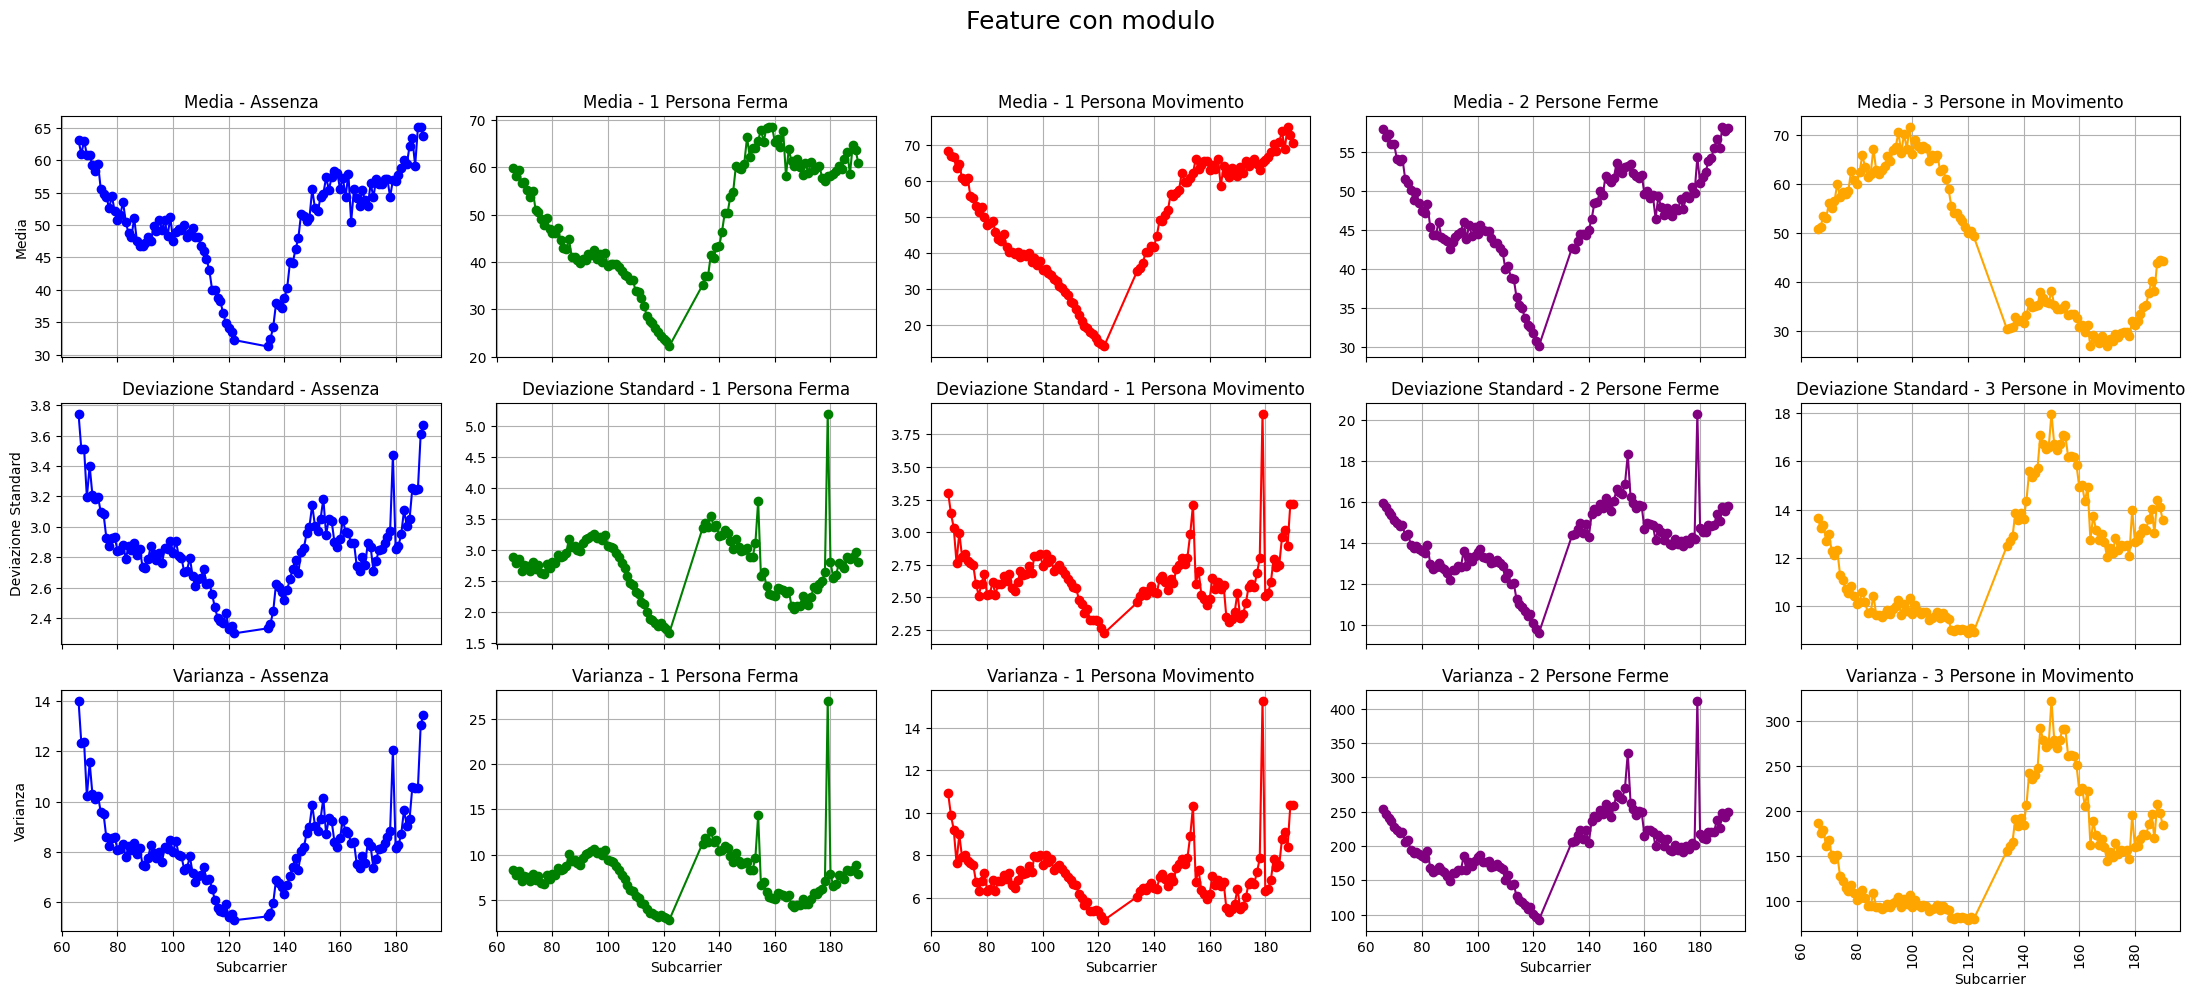

In [104]:
import matplotlib.pyplot as plt

# 3 righe (metriche) × 5 colonne (le tue 5 feature)
fig, axes = plt.subplots(3, 5, figsize=(22, 10), sharex=True)

# Dataset da confrontare
datasets = [
    feature_absence,
    feature_unapersonaferma,
    feature_unapersona_movimento,
    feature_duepersoneferme,
    feature_trepersoneinmovimento
]
titles = [
    'Assenza', 
    '1 Persona Ferma', 
    '1 Persona Movimento', 
    '2 Persone Ferme', 
    '3 Persone in Movimento'
]
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Colori coerenti
metrics = ['mean', 'std', 'variance']
metric_labels = ['Media', 'Deviazione Standard', 'Varianza']

# Loop su righe (metriche) e colonne (feature)
for row in range(3):  # mean, std, variance
    for col in range(5):  # 5 feature
        ax = axes[row][col]
        df = datasets[col]
        ax.plot(df.index, df[metrics[row]], marker='o', color=colors[col])
        ax.set_title(f'{metric_labels[row]} - {titles[col]}')
        ax.grid(True)

        if col == 0:
            ax.set_ylabel(metric_labels[row])

        if row == 2:
            ax.set_xlabel('Subcarrier')
fig.suptitle("Feature con modulo ", fontsize=18)
# Ottimizzazione layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.xticks(rotation=90)
plt.show()


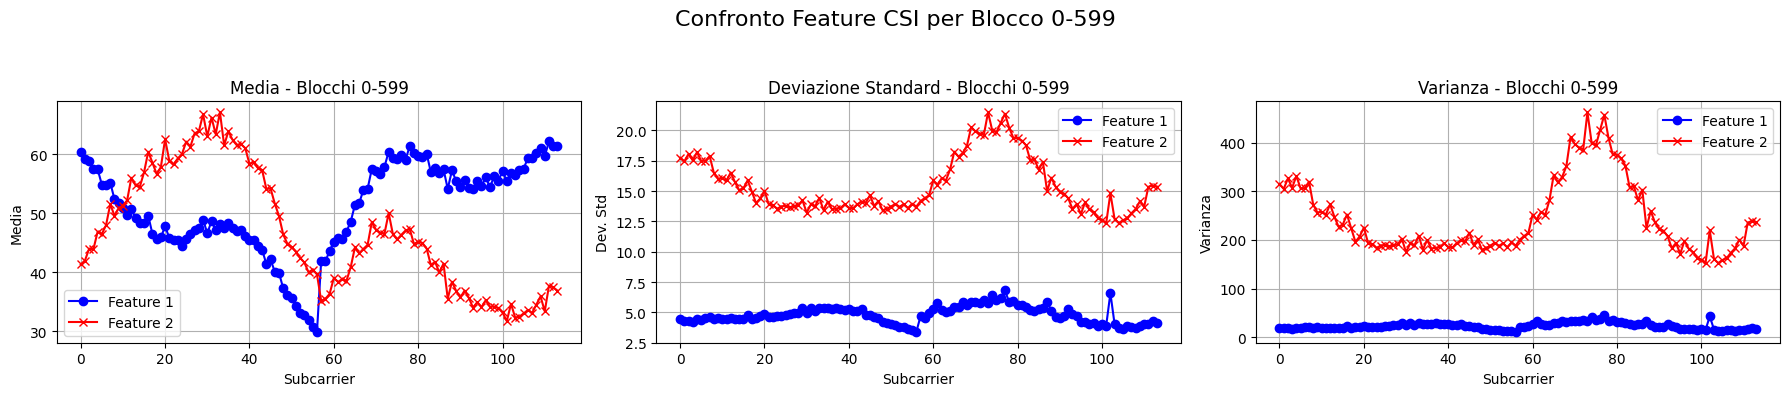

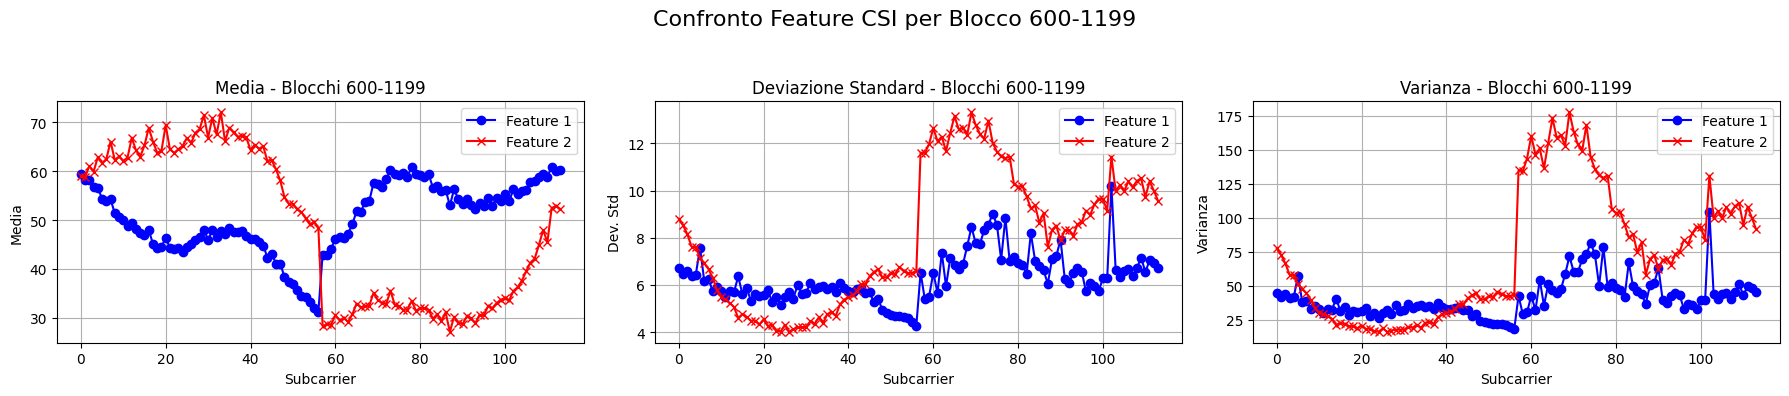

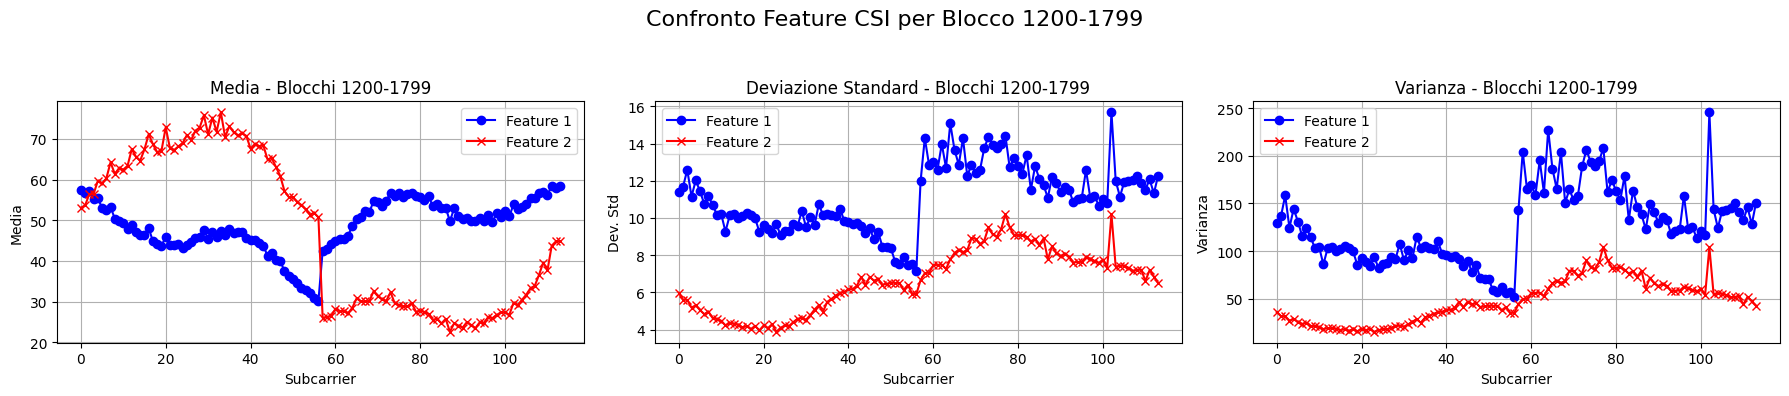

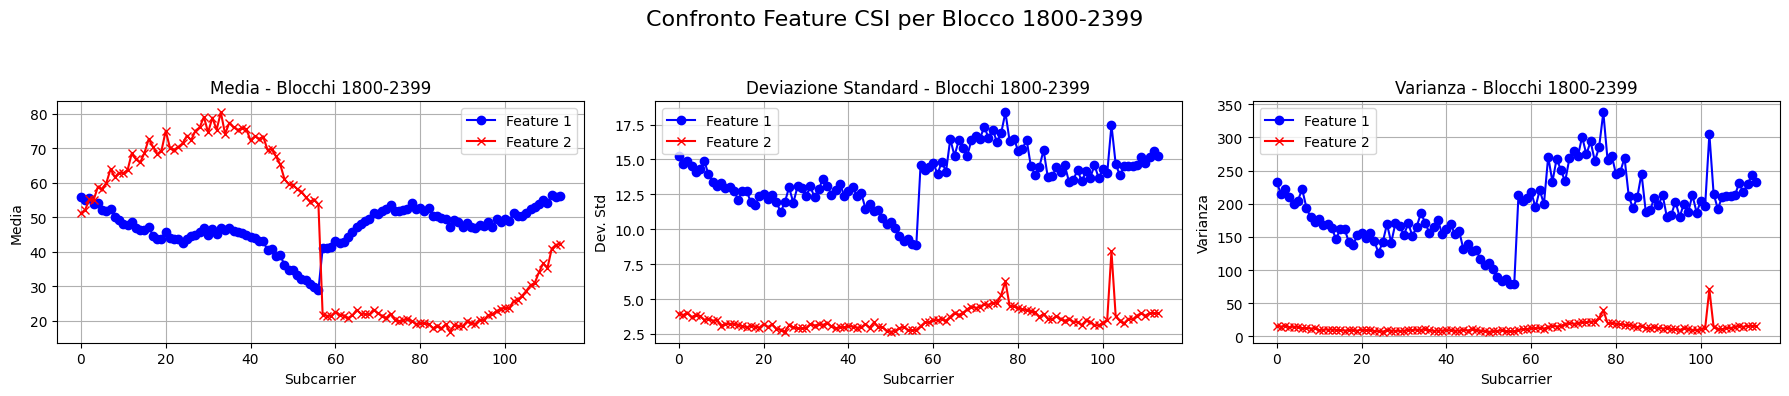

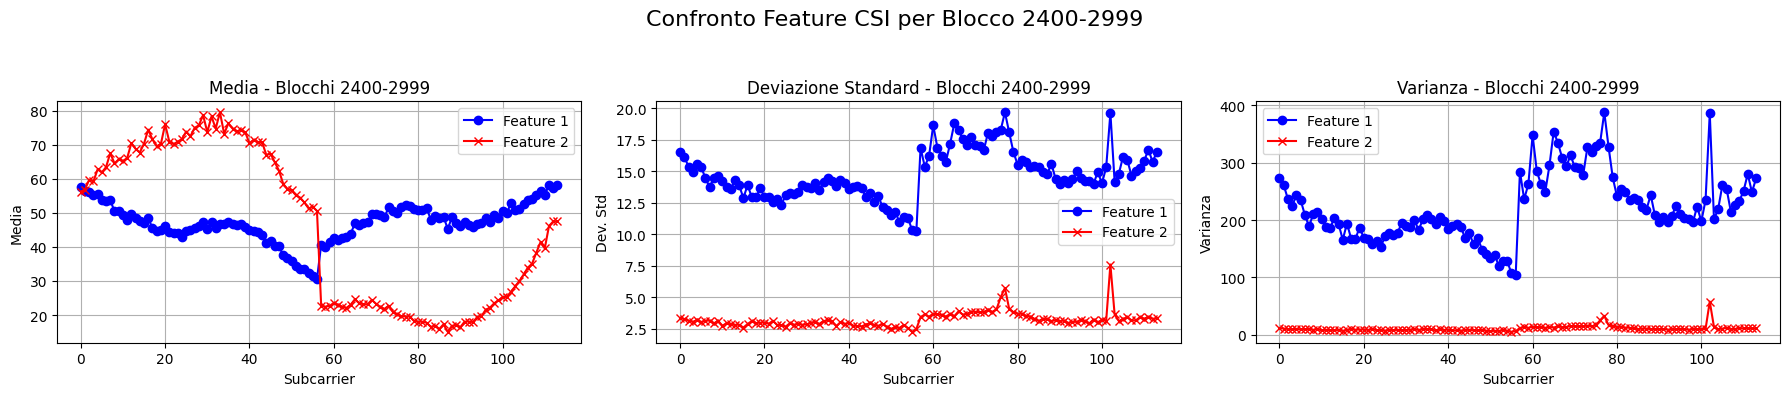

In [105]:
# Parametri
window_size = 600
step = 600

# Dataset da confrontare
df1 = df_duepersonefermeHTLTFvalid_mod
df2 = df_trepersoneinmovimentoHTLTFvalid_mod  

# Esegui su n blocchi
for i in range(5):
    start = i * step
    end = start + window_size
    block1 = df1.iloc[start:end]
    block2 = df2.iloc[start:end]

    # Calcola le feature per ogni subcarrier (colonna)
    mean1, std1, var1 = block1.mean(), block1.std(), block1.var()
    mean2, std2, var2 = block2.mean(), block2.std(), block2.var()

    # Crea i 3 plot per questo blocco
    fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharex=True)

    # Media
    axes[0].plot(mean1.values, marker='o', label='Feature 1', color='blue')
    axes[0].plot(mean2.values, marker='x', label='Feature 2', color='red')
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    axes[1].plot(std1.values, marker='o', label='Feature 1', color='blue')
    axes[1].plot(std2.values, marker='x', label='Feature 2', color='red')
    axes[1].set_title(f"Deviazione Standard - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Dev. Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    axes[2].plot(var1.values, marker='o', label='Feature 1', color='blue')
    axes[2].plot(var2.values, marker='x', label='Feature 2', color='red')
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo generale e layout
    plt.suptitle(f"Confronto Feature CSI per Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


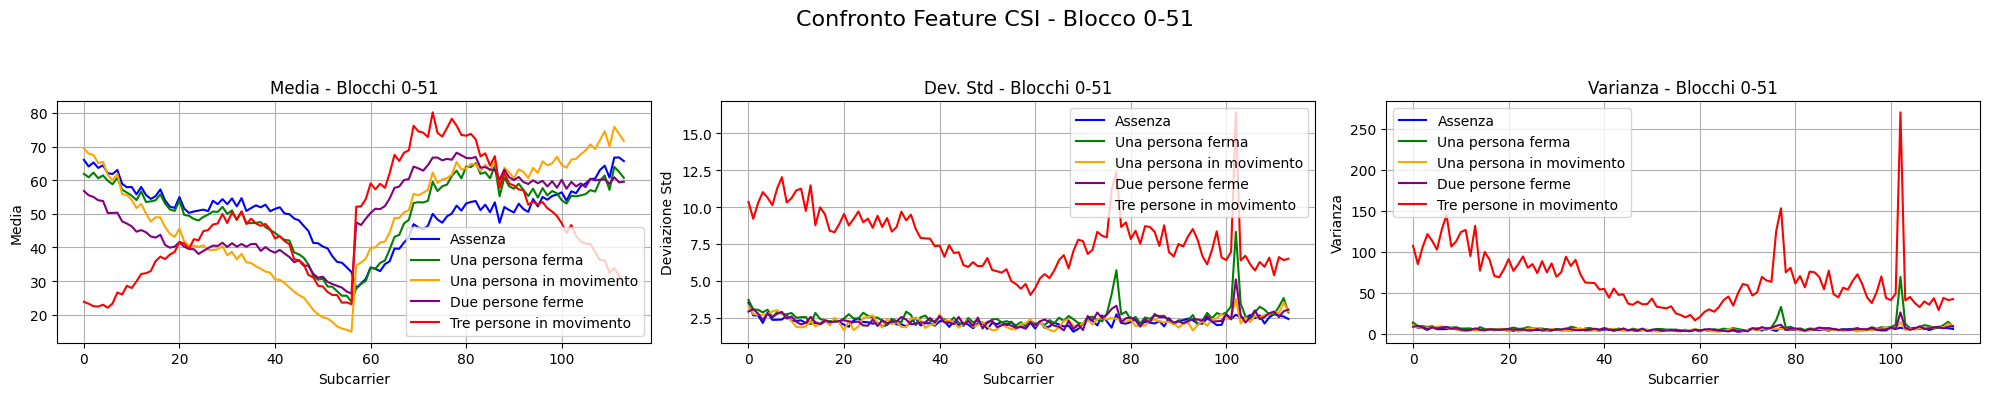

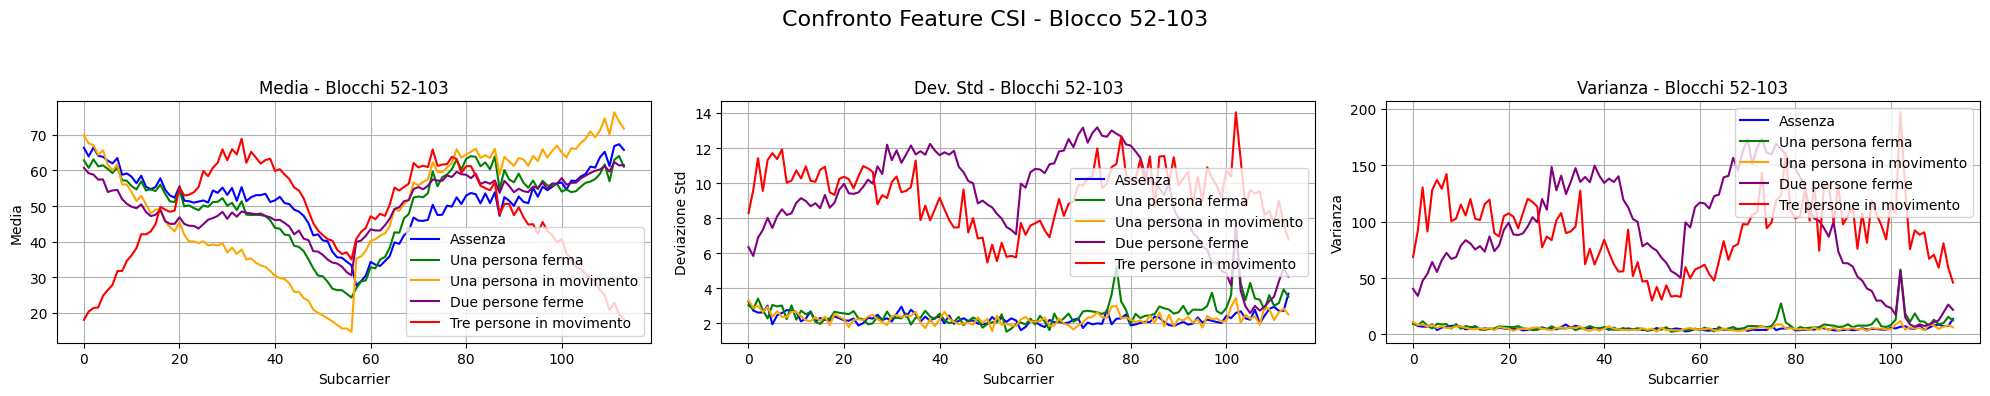

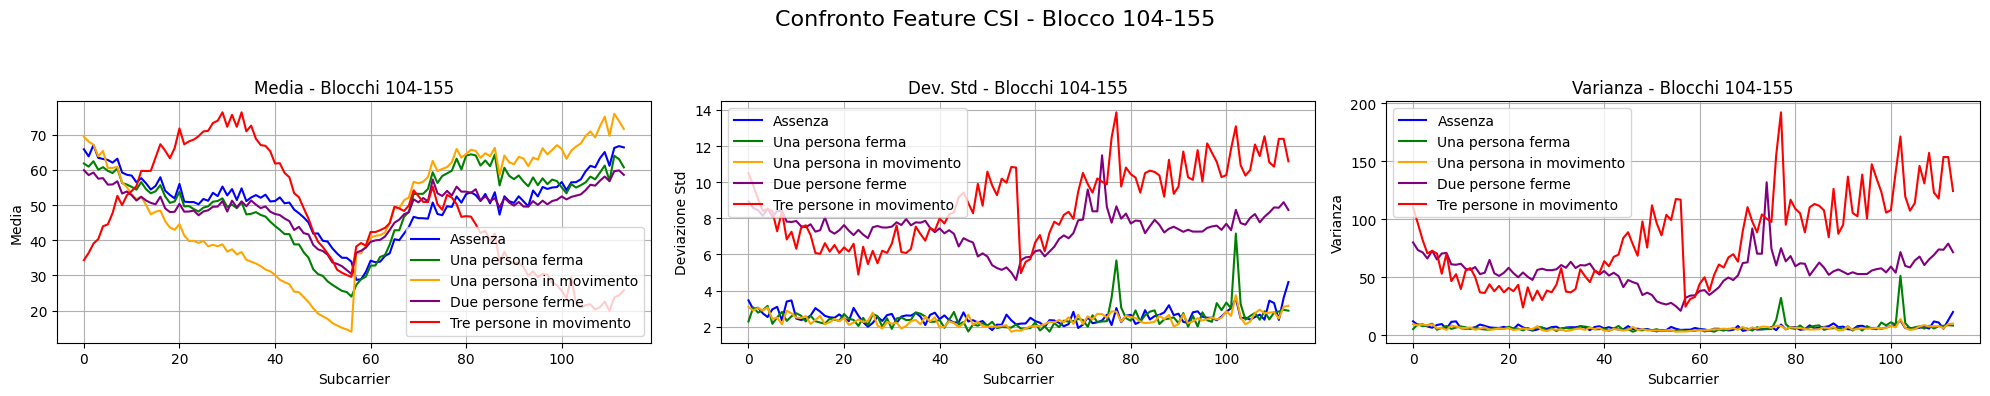

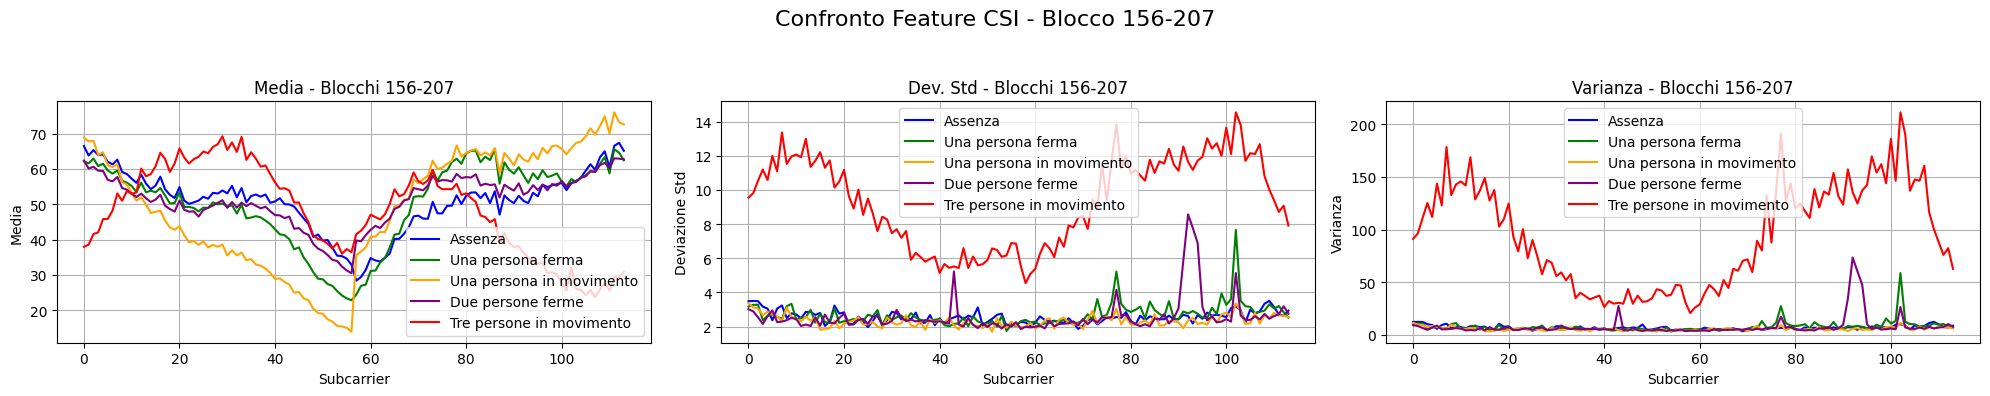

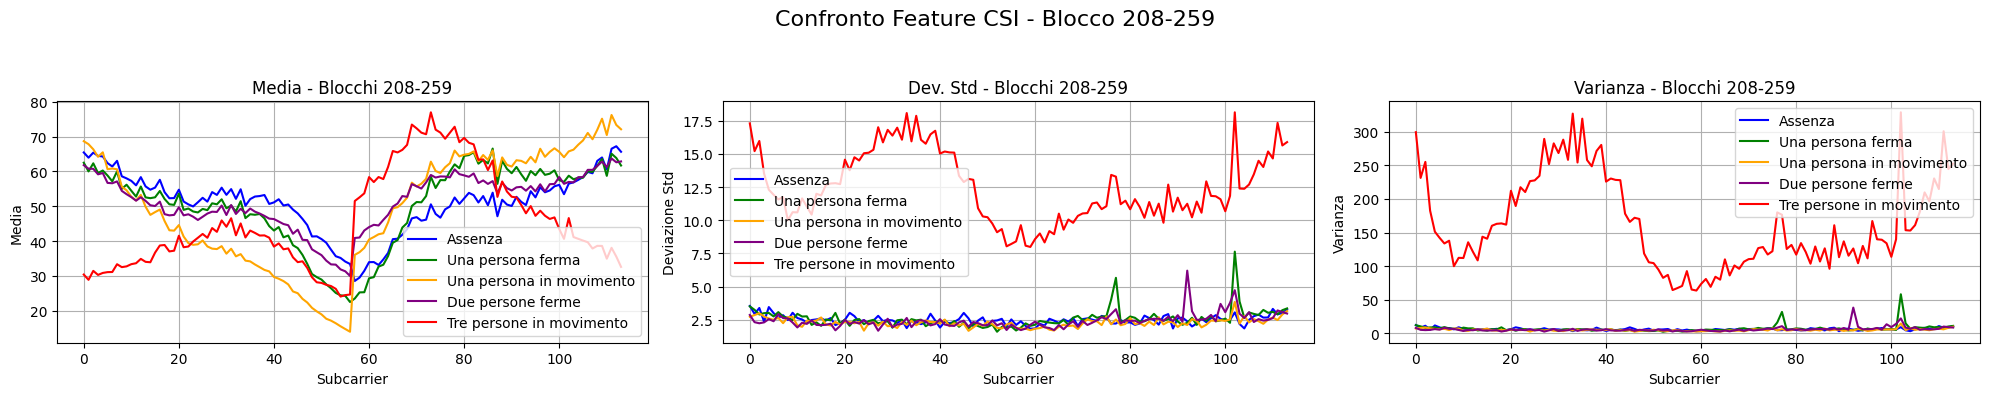

In [106]:
import matplotlib.pyplot as plt

# Parametri
window_size = 52
step = 52

n_blocchi = 5

# Dizionario dei dataset
dataset_dict = {
    "Assenza": df_absenceHTLTFvalid_mod,
    "Una persona ferma": df_unapersonafermaHTLTFvalid_mod,
    "Una persona in movimento": df_unapersona_movimentoHTLTFvalid_mod,
    "Due persone ferme": df_duepersonefermeHTLTFvalid_mod,
    "Tre persone in movimento": df_trepersoneinmovimentoHTLTFvalid_mod
}

# Colori distinti per ogni dataset
colori = ['blue', 'green', 'orange', 'purple', 'red']

# Loop sui blocchi
for i in range(n_blocchi):
    start = i * step
    end = start + window_size

    # Dizionari per memorizzare le feature di ogni dataset
    medie = {}
    deviazioni = {}
    varianze = {}

    for (label, df) in dataset_dict.items():
        blocco = df.iloc[start:end]
        medie[label] = blocco.mean()
        deviazioni[label] = blocco.std()
        varianze[label] = blocco.var()

    # Creazione dei plot
    fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharex=True)

    # Media
    for j, (label, valori) in enumerate(medie.items()):
        axes[0].plot(valori.values, label=label, color=colori[j])
    axes[0].set_title(f"Media - Blocchi {start}-{end-1}")
    axes[0].set_xlabel("Subcarrier")
    axes[0].set_ylabel("Media")
    axes[0].legend()
    axes[0].grid(True)

    # Deviazione standard
    for j, (label, valori) in enumerate(deviazioni.items()):
        axes[1].plot(valori.values, label=label, color=colori[j])
    axes[1].set_title(f"Dev. Std - Blocchi {start}-{end-1}")
    axes[1].set_xlabel("Subcarrier")
    axes[1].set_ylabel("Deviazione Std")
    axes[1].legend()
    axes[1].grid(True)

    # Varianza
    for j, (label, valori) in enumerate(varianze.items()):
        axes[2].plot(valori.values, label=label, color=colori[j])
    axes[2].set_title(f"Varianza - Blocchi {start}-{end-1}")
    axes[2].set_xlabel("Subcarrier")
    axes[2].set_ylabel("Varianza")
    axes[2].legend()
    axes[2].grid(True)

    # Titolo generale
    plt.suptitle(f"Confronto Feature CSI - Blocco {start}-{end-1}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()
